## Source Data

In [ ]:
import gdown
import tensorflow as tf
import numpy as np
import os
import random
import networkx as nx
import csv

!mkdir datasets
!pip install pyvis
from pyvis.network import Network

#############################################################################################
# Facebook DATASET DOWNLOADS source: https://github.com/fatemehsrz/Shortest_Distance/tree/master/data
#############################################################################################
# Download facebook dataset edgelist in txt format (extracted from mtx)
!gdown https://drive.google.com/uc?id=1v03XWRternGLDpRfKbRGoMiVX3dpOW3G -O datasets/facebook_edges.txt


# Download facebook data random landmark
!gdown https://drive.google.com/uc?id=1bbJtjPUjEmq8FZihwn0iH41kxI6i-5CR -O ./datasets/train_facebook_random.txt
!gdown https://drive.google.com/uc?id=1rZ1WnjntCb7E3pS0Nw1ZZO6EwaT5uQJH -O ./datasets/test_facebook_random.txt

# Download facebook data corasening landmark
!gdown https://drive.google.com/uc?id=1LiadUU7jar9jiz_c__55Wx4QcJTSUeFR -O ./datasets/train_facebook_coarsening.txt
!gdown https://drive.google.com/uc?id=1OsUiEGlkRjsrkV2ml9_UpbXAxnCCx3D3 -O ./datasets/test_facebook_coarsening.txt

# Download facebook data community detection landmark
!gdown https://drive.google.com/uc?id=1rbHU2heYIjJP7l-1idp1fXp2JYWMfSFN -O ./datasets/train_facebook_community_detection.txt
!gdown https://drive.google.com/uc?id=1KBgltCq3xB_s4xNooaMl3SijlAdHJgLH -O ./datasets/test_facebook_community_detection.txt

#############################################################################################
# Embedding DOWNLOADS
#############################################################################################
# Download pretrained facebook embeddings
!gdown https://drive.google.com/uc?id=1HcIw2HFM9VVCHGLyWK1pnpgKKdbtOMNi -O datasets/facebook_harp_node2vec.npy
!gdown https://drive.google.com/uc?id=1qMLE-8nVjYHZhzK0y20PNmuo0Rs_C24U -O datasets/facebook_harp_line.npy
!gdown https://drive.google.com/uc?id=1vam0zb3B5l54jslRs8yBY1Kw_jAszXMu -O datasets/facebook_sdne.npy
!gdown https://drive.google.com/uc?id=1kB0GYx4tcMIWqPzPztTzgLzyfurXnTao -O datasets/facebook_line.npy
!gdown https://drive.google.com/uc?id=1mxzYRqMNu_QeZ5NKAUo6ozMJ22Stz8BD -O datasets/facebook_node2vec.npy




#############################################################################################
# BlogCatalog DATASET DOWNLOADS source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
# Download blogcatalog dataset edgelist in cvs format
#!gdown https://drive.google.com/uc?id=1EcaUE7hyzTLybL-6oLrSiLzRXzlNLS1i -O datasets/blogcatalog_edges.csv

#############################################################################################
# Douban DATASET DOWNLOADS source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
# Download blogcatalog dataset edgelist in cvs format
#!gdown https://drive.google.com/uc?id=1ssjgKF5WpiXcIk7DfF6BXwPoWkqr5rOS -O datasets/douban_edges.csv

#############################################################################################
# Lastfm DATASET DOWNLOADS source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
# Download blogcatalog dataset edgelist in cvs format
#!gdown https://drive.google.com/uc?id=1S83GMt_ARPfHFtoV_fpJHsFv5pqUrUWF -O datasets/lastfm_edges.csv

#############################################################################################
# Youtube DATASET DOWNLOADS  source: http://datasets.syr.edu/pages/datasets.html
#############################################################################################
#!gdown https://drive.google.com/uc?id=12aGrbOZqVMfOP46X8lj5qwqQui4kbMjZ -O datasets/youtube_edges.csv

#############################################################################################
# Flickr DATASET DOWNLOADS  source: http://networkrepository.com/soc-flickr-und.php
#############################################################################################
#!gdown https://drive.google.com/uc?id=1UFr2R3hBkWW22Ulke0cczzL9Qt3ySNMw -O datasets/flickr_edges.txt

#############################################################################################
# FRAMEWORK SETUPS
#############################################################################################
# Graph embeddings framework @see: https://github.com/shenweichen/GraphEmbedding
!gdown https://drive.google.com/uc?id=1QwaC2pz6wC8QGAA1N7208SxEzdPfkn3S -O GraphEmbedding.zip
!unzip GraphEmbedding.zip
# HARP
#!gdown https://drive.google.com/uc?id=174k2qDmDhXrKFivGD00jBWAvJp9b1kiq -O HARP.zip
#!unzip HARP.zip

Downloading...
From: https://drive.google.com/uc?id=1v03XWRternGLDpRfKbRGoMiVX3dpOW3G
To: /content/datasets/facebook_edges.txt
100% 854k/854k [00:00<00:00, 53.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bbJtjPUjEmq8FZihwn0iH41kxI6i-5CR
To: /content/datasets/train_facebook_random.txt
11.5MB [00:00, 69.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rZ1WnjntCb7E3pS0Nw1ZZO6EwaT5uQJH
To: /content/datasets/test_facebook_random.txt
100% 1.23M/1.23M [00:00<00:00, 75.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LiadUU7jar9jiz_c__55Wx4QcJTSUeFR
To: /content/datasets/train_facebook_coarsening.txt
11.9MB [00:00, 72.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OsUiEGlkRjsrkV2ml9_UpbXAxnCCx3D3
To: /content/datasets/test_facebook_coarsening.txt
100% 1.31M/1.31M [00:00<00:00, 86.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rbHU2heYIjJP7l-1idp1fXp2JYWMfSFN
To: /content/datasets/train_facebook_community_detection.txt
11.6MB [00:00

## Set Flags and Seed

In [ ]:
dataset = "facebook" # possible values: facebook, blogcatalog, douban, lastfm, youtube, flickr
is_new_data_split = False # sets whether to create new data and train set or rely on existing train-test files which were downloaded before
landmark_technique = "random" # possible values: random, coarsening, community_detection
embedding_method = "node2vec" # possible values: node2vec, struc2vec, deepwalk, line, sdne, harp_node2vec, harp_deepwalk, harp_line

# Setting different seeds for reproducability
seed_value= 122
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

## Preprocess Data

### Split Train-Test

#### Load train set

In [ ]:

def load_training_data(dataset, landmark_technique):
  train_list1 = []
  train_list2 = []
  y_train = []
  f_train = open('./datasets/train_'+dataset+'_'+landmark_technique+'.txt', 'r')
  for line in f_train:
    a=line.strip('\n').split(' ')
    train_list1.append(int(a[0])) 
    train_list2.append(int(a[1]))
    y_train.append(int(a[2]))
  f_train.close()
  print("Number of training pairs:", len(y_train))
  print("Path Lengths in train set: ",np.unique(np.array(y_train))," Size of each length: ", np.unique(np.array(y_train),return_counts=True)[1])
  return train_list1, train_list2, y_train


#### Load test set

In [ ]:
def load_testing_data(dataset, landmark_technique):

  y_test = []

  # Load test set from txt
  test_list1=[]
  test_list2=[]    
  f_test= open('./datasets/test_'+dataset+'_'+landmark_technique+'.txt', 'r') 

  for line in f_test:
    a=line.strip('\n').split(' ')
    test_list1.append(int(a[0])) 
    test_list2.append(int(a[1]))
    y_test.append(int(a[2]))
  f_test.close()
  print("Number of testing pairs:", len(y_test))
  print("Path Lengths in test set: ",np.unique(np.array(y_test))," Size of each length: ", np.unique(np.array(y_test),return_counts=True)[1])
  return test_list1, test_list2, y_test


## Create Emeddings

#### Train embeddings

In [ ]:
from GraphEmbedding.ge.models import Node2Vec, DeepWalk, SDNE, Struc2Vec, LINE
from collections import OrderedDict

def load_embedding(embedding_method="node2vec", dataset="facebook"):
  print("./datasets/"+dataset+"_"+embedding_method+".npy")
  try:
    embedding_vectors_res = np.load("./datasets/"+dataset+"_"+embedding_method+".npy")
  except:
    print("The requested embedding does not exist")
  print("EMBEDDING VECTORS SHAPE:", embedding_vectors_res.shape)
  return embedding_vectors_res


### Preprocess embeddings

In [ ]:
def preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, emb_size = 128, con_type = "avg"):
  X_train_binary = []
  X_test_binary = []
  for i in range(len(train_list1)):
    if con_type == "avg":
      con_x = (embedding_vectors[train_list1[i]] + embedding_vectors[train_list2[i]])/2
    elif con_type == "concat":
      con_x = np.concatenate( [embedding_vectors[train_list1[i]],embedding_vectors[train_list2[i]]], axis=0)
    elif con_type == "hadamard":
      con_x = embedding_vectors[train_list1[i]] * embedding_vectors[train_list2[i]]
    elif con_type =="sub":
      con_x = embedding_vectors[train_list1[i]] - embedding_vectors[train_list2[i]]
    elif con_type =="conv":
      con_x = [embedding_vectors[train_list1[i]],embedding_vectors[train_list2[i]]]

    X_train_binary.append(con_x)

  for i in range(len(test_list1)):
    if con_type == "avg":
      con_x = (embedding_vectors[test_list1[i]] + embedding_vectors[test_list2[i]])/2
    elif con_type == "concat":
      con_x = np.concatenate( [embedding_vectors[test_list1[i]],embedding_vectors[test_list2[i]]], axis=0)
    elif con_type == "hadamard":
      con_x = embedding_vectors[test_list1[i]] * embedding_vectors[test_list2[i]]
    elif con_type =="sub":
      con_x = embedding_vectors[test_list1[i]] - embedding_vectors[test_list2[i]]
    elif con_type =="conv":
      con_x = [embedding_vectors[test_list1[i]],embedding_vectors[test_list2[i]]]

    X_test_binary.append(con_x)

  print("Embedded training set size:", len(X_train_binary))
  print("Embedded test set size:", len(X_test_binary))

  train_test_split = [np.array(X_train_binary), np.array(y_train), np.array(X_test_binary), np.array(y_test)]
  if con_type == "conv":
    train_test_split[0] = train_test_split[0].reshape(-1, 2, emb_size, 1)
    train_test_split[2] = train_test_split[2].reshape(-1, 2, emb_size, 1)

  print("Train test split summary: \n", "Train X shape:", train_test_split[0].shape\
        ,"Train y shape:", train_test_split[1].shape,
        "\n Test X shape:", train_test_split[2].shape,
        "Test y shape:", train_test_split[3].shape)
  return train_test_split

# Shuffle for train data before training
def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

# Models

## MLP Regression

In [ ]:
import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import SGD

def create_regression_model(input_dim, emb_size=128):
  model = Sequential()
  model.add(Dense(emb_size, input_dim=input_dim))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  dense_size= int(0.2*input_dim)
  model.add(Dense(dense_size))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(1))
  model.add(Activation('softplus'))

  opt=SGD(learning_rate=0.05, momentum=0.2)
  model.compile(loss='mse', optimizer='sgd', metrics=['mae'])
  #model.summary()
  return model

## MLP Regression with Conv Concat

In [ ]:
def create_regression_conv_model(emb_size=128):

  model = Sequential()
  model.add(Conv2D(1, (2,1),kernel_constraint="non_neg",use_bias=False,input_shape=(2,emb_size,1)))
  model.add(Flatten())
  model.add(Dense(emb_size))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  dense_size= int(0.2*emb_size)
  model.add(Dense(dense_size))

  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(1))
  model.add(Activation('softplus'))

  opt=SGD(learning_rate=0.05, momentum=0.01)
  model.compile(loss='mse', optimizer=opt, metrics=['mae'])
  return model

# Train Model

In [ ]:
import keras.callbacks as cb
from keras.callbacks import LambdaCallback

def train_regressor(model, X_train, y_train, epochs=15, batch_size = 32):
  class LossHistory(cb.Callback):
      def on_train_begin(self, logs={}):
          self.losses = []

      def on_batch_end(self, batch, logs={}):
          batch_loss = logs.get('loss')
          self.losses.append(batch_loss)
  history = LossHistory()
  model.fit(X_train, y_train, epochs= epochs, batch_size= batch_size, callbacks=[history], validation_split= 0.3, verbose=2)

# Test Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

def test_model(model,X_train, X_test, y_test):
  preds = model.predict(X_test)
  pred = []

  for i in range(len(preds)):
    pred.append(round(float(preds[i][0])))

  rmse = (mean_squared_error(y_test, pred))**0.5
  mae = mean_absolute_error(y_test, pred)
  print("RMSE:", rmse, "MAE:", mae, "\nSummary:", "Train size:", len(X_train), "Test size:", len(X_test))
  
  accuracy = accuracy_score(y_test,pred)
  print('Accuracy: %f' % accuracy)
  print('Paths: \t\t',np.unique(y_test))
  precision = precision_score(y_test,pred,average=None)
  print('Precision: \t' , precision)
  recall = recall_score(y_test,pred,average=None)
  print('Recall: \t' , recall)
  f1 = f1_score(y_test,pred,average=None)
  print('F1 score: \t', f1)

  return rmse, mae, accuracy, precision, recall, f1

def test_model_detailed(model, X_test, y_test):
  preds = model.predict(X_test)
  pred = []

  indexes_2 = []
  indexes_3 = []
  indexes_4 = []
  indexes_5 = []
  indexes_6 = []
  y_test_2 = []
  y_test_3 = []
  y_test_4 = []
  y_test_5 = []
  y_test_6 = []

  pred_2 = []
  pred_3 = []
  pred_4 = []
  pred_5 = []
  pred_6 = []

  for i in range(len(y_test)):
      if y_test[i]==2:
          indexes_2.append(i)
          y_test_2.append(y_test[i])
      if y_test[i]==3:
          indexes_3.append(i)
          y_test_3.append(y_test[i])
      if y_test[i]==4:
          indexes_4.append(i)
          y_test_4.append(y_test[i])
      if y_test[i]==5:
          indexes_5.append(i)
          y_test_5.append(y_test[i])
      if y_test[i]==6:
          indexes_6.append(i)
          y_test_6.append(y_test[i])

  for i in range(len(y_test_2)):
    pred_2.append(round(float(preds[indexes_2[i]][0])))

  for i in range(len(y_test_3)):
    pred_3.append(round(float(preds[indexes_3[i]][0])))

  for i in range(len(y_test_4)):
    pred_4.append(round(float(preds[indexes_4[i]][0])))

  for i in range(len(y_test_5)):
    pred_5.append(round(float(preds[indexes_5[i]][0])))

  for i in range(len(y_test_6)):
    pred_6.append(round(float(preds[indexes_6[i]][0])))

  rmse2 = (mean_squared_error(y_test_2, pred_2))**0.5
  mae2 = mean_absolute_error(y_test_2, pred_2)

  rmse3 = (mean_squared_error(y_test_3, pred_3))**0.5
  mae3 = mean_absolute_error(y_test_3, pred_3)

  rmse4 = (mean_squared_error(y_test_4, pred_4))**0.5
  mae4 = mean_absolute_error(y_test_4, pred_4)

  rmse5 = (mean_squared_error(y_test_5, pred_5))**0.5
  mae5 = mean_absolute_error(y_test_5, pred_5)

  rmse6 = (mean_squared_error(y_test_6, pred_6))**0.5
  mae6 = mean_absolute_error(y_test_6, pred_6)

  print("RMSE at length 2:", rmse2, "MAE at length 2:", mae2)
  print("RMSE at length 3:", rmse3, "MAE at length 3:", mae3)
  print("RMSE at length 4:", rmse4, "MAE at length 4:", mae4)
  print("RMSE at length 5:", rmse5, "MAE at length 5:", mae5)
  print("RMSE at length 6:", rmse6, "MAE at length 6:", mae6)
  return rmse2, mae2, rmse3, mae3, rmse4, mae4, rmse5, mae5, rmse6, mae6

def plot_test_losses(model, X_test, y_test):
    rmse2, mae2, rmse3, mae3, rmse4, mae4, rmse5, mae5, rmse6, mae6 = test_model_detailed(model, X_test, y_test)

    labels = ['SP2', 'SP3', 'SP4', 'SP5', 'SP6']
    rmse_values = [rmse2, rmse3, rmse4, rmse5, rmse6]
    mae_values = [mae2, mae3, mae4, mae5, mae6]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
    rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Loss values')
    ax.set_title('Losses by shortest path distance')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

### Train test loop

In [ ]:
def train_test_loop(emb_method, epochs, dataset ):
  print("#### TRAIN TEST LOOP")
  # Create Embeddings
  embedding_vectors = load_embedding(embedding_method= emb_method, dataset=dataset)

  # Test with avg binary operator
  print("Embedding method: ", emb_method, "Binary operator: avg")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, 128,"avg")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_model(X_train.shape[1])
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)
  plot_test_losses(model, X_test, y_test)
  # Test with conc binary operator
  print("Embedding method: ", emb_method, "Binary operator: concat")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, 128,"concat")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_model(X_train.shape[1])
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)
  plot_test_losses(model, X_test, y_test)
  # Test with convolution
  print("Embedding method: ", emb_method, "Binary operator: conv")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, 128,"conv")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_conv_model()
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)
  plot_test_losses(model, X_test, y_test)

In [ ]:
#G, nodes, edges, num_nodes, num_edges = read_data(dataset)
##!gdown https://drive.google.com/uc?id=1ZBMKiNqy28Gyi0-xuLEaXwoMXz9q6Egu -O datasets/train.txt
##!gdown https://drive.google.com/uc?id=1EIZ_Kg8l1pvRnM5Ht7dUe08uMt81P9Un -O datasets/test.txt
#k1_nodes, k2_nodes, remaining_nodes_train, remaining_nodes_test = select_landmarks(num_nodes, landmark_technique, nodes, is_new_data_split)
##visualise_graph_with_landmarks(G, k1_nodes, landmark_technique)
#generate_and_save_train_data(G, k1_nodes, is_new_data_split)
#generate_and_save_test_data(G, k2_nodes, is_new_data_split)
#train_list1, train_list2, y_train = load_training_data()
#test_list1, test_list2, y_test = load_testing_data()
#  
#train_test_loop_optim("node2vec", 128, 15, {"p": 2, "q":64})

### Run tests



### LANDMARK RUN random ###
Number of training pairs: 1022640
Path Lengths in train set:  [2 3 4 5 6]  Size of each length:  [389132 320865 221561  72701  18381]
Number of testing pairs: 109978
Path Lengths in test set:  [2 3 4 5 6]  Size of each length:  [42666 35029 23663  6947  1673]
### EMBEDDING RUN node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: avg
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 128) Train y shape: (1022640,) 
 Test X shape: (109978, 128) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 33s - loss: 0.2701 - mae: 0.3879 - val_loss: 0.0705 - val_mae: 0.1994
Epoch 2/15
22371/22371 - 32s - loss: 0.1533 - mae: 0.2959 - val_loss: 0.0581 - val_mae: 0.1781
Epoch 3/15
22371/22371 - 33s - loss: 0.1361 - mae: 0.2758 - val_loss: 0.0530 - val_mae: 0.1666
Epoch 4/15
22371/22371 - 36s - loss: 0.1271 - mae: 0.2647 - val_loss: 0.0409 - v

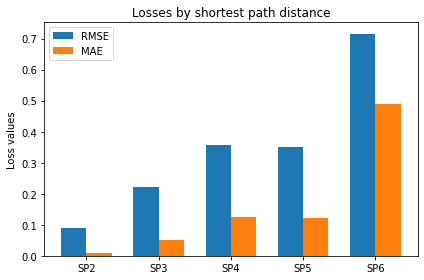

Embedding method:  node2vec Binary operator: concat
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 256) Train y shape: (1022640,) 
 Test X shape: (109978, 256) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 36s - loss: 0.1989 - mae: 0.3194 - val_loss: 0.0415 - val_mae: 0.1442
Epoch 2/15
22371/22371 - 39s - loss: 0.1043 - mae: 0.2366 - val_loss: 0.0318 - val_mae: 0.1171
Epoch 3/15
22371/22371 - 36s - loss: 0.0895 - mae: 0.2190 - val_loss: 0.0262 - val_mae: 0.1028
Epoch 4/15
22371/22371 - 36s - loss: 0.0816 - mae: 0.2095 - val_loss: 0.0227 - val_mae: 0.0977
Epoch 5/15
22371/22371 - 36s - loss: 0.0770 - mae: 0.2033 - val_loss: 0.0275 - val_mae: 0.1081
Epoch 6/15
22371/22371 - 36s - loss: 0.0736 - mae: 0.1984 - val_loss: 0.0200 - val_mae: 0.0867
Epoch 7/15
22371/22371 - 36s - loss: 0.0704 - mae: 0.1938 - val_loss: 0.0187 - val_mae: 0.0844
Epoch 8/15
22371/22371 - 36s - loss: 0.0678 - mae: 0.1897 - val_loss: 0.01

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.86696667 0.92217877 0.92431222 0.82496041 0.54572624 0.        ]
F1 score: 	 [0.92135251 0.86531301 0.89797594 0.84609139 0.67033774 0.        ]
RMSE at length 2: 0.36473734199525015 MAE at length 2: 0.1330333286457601
RMSE at length 3: 0.2789645745158739 MAE at length 3: 0.07782123383482258
RMSE at length 4: 0.2767223230097192 MAE at length 4: 0.075983603093437
RMSE at length 5: 0.4188930967622198 MAE at length 5: 0.1751835324600547
RMSE at length 6: 0.6845577016307133 MAE at length 6: 0.45905558876270175


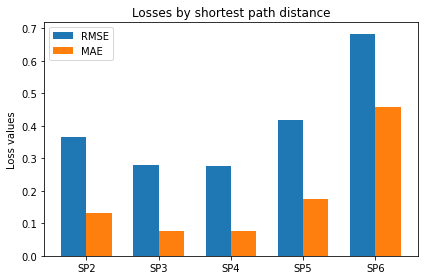

Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 51s - loss: 0.1718 - mae: 0.3054 - val_loss: 0.0382 - val_mae: 0.1316
Epoch 2/15
22371/22371 - 51s - loss: 0.1192 - mae: 0.2529 - val_loss: 0.0404 - val_mae: 0.1299
Epoch 3/15
22371/22371 - 51s - loss: 0.1115 - mae: 0.2438 - val_loss: 0.0334 - val_mae: 0.1285
Epoch 4/15
22371/22371 - 51s - loss: 0.1075 - mae: 0.2389 - val_loss: 0.0323 - val_mae: 0.1228
Epoch 5/15
22371/22371 - 51s - loss: 0.1056 - mae: 0.2363 - val_loss: 0.0279 - val_mae: 0.1099
Epoch 6/15
22371/22371 - 52s - loss: 0.1032 - mae: 0.2338 - val_loss: 0.0281 - val_mae: 0.1186
Epoch 7/15
22371/22371 - 51s - loss: 0.1022 - mae: 0.2323 - val_loss: 0.0285 - val_mae: 0.1110
Epoch 8/15
22371/22371 - 51s - loss: 0.1013 - mae: 0.2310 - val_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.9922655  0.95001285 0.93542662 0.90168418 0.58278542 0.        ]
F1 score: 	 [0.98691066 0.94828028 0.93422247 0.90071177 0.72897196 0.        ]
RMSE at length 2: 0.08794598257736211 MAE at length 2: 0.00773449585149768
RMSE at length 3: 0.22357807026044518 MAE at length 3: 0.049987153501384565
RMSE at length 4: 0.2541129367208271 MAE at length 4: 0.06457338460888307
RMSE at length 5: 0.33807386741678586 MAE at length 5: 0.10364185979559522
RMSE at length 6: 0.6623690929548668 MAE at length 6: 0.42438732815301855


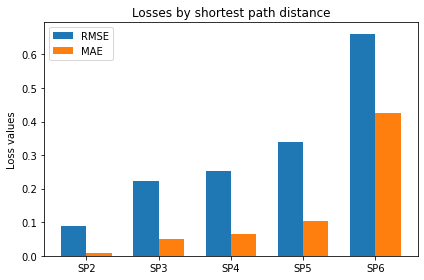

### EMBEDDING RUN harp_node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  harp_node2vec Binary operator: avg
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 128) Train y shape: (1022640,) 
 Test X shape: (109978, 128) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 36s - loss: 0.2775 - mae: 0.3935 - val_loss: 0.0909 - val_mae: 0.2216
Epoch 2/15
22371/22371 - 32s - loss: 0.1723 - mae: 0.3146 - val_loss: 0.0862 - val_mae: 0.2136
Epoch 3/15
22371/22371 - 36s - loss: 0.1579 - mae: 0.2986 - val_loss: 0.0670 - val_mae: 0.1827
Epoch 4/15
22371/22371 - 35s - loss: 0.1501 - mae: 0.2894 - val_loss: 0.0647 - val_mae: 0.1825
Epoch 5/15
22371/22371 - 32s - loss: 0.1462 - mae: 0.2842 - val_loss: 0.0712 - val_mae: 0.1888
Epoch 6/15
22371/22371 - 32s - loss: 0.1423 - mae: 0.2793 - val_loss: 0.0571 - val_mae: 0.1666
Epoch 7/15
22371/22371 - 32s - loss: 0.1389 - mae: 0.2749 - val_loss: 0.0

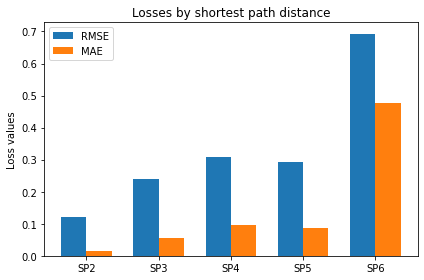

Embedding method:  harp_node2vec Binary operator: concat
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 256) Train y shape: (1022640,) 
 Test X shape: (109978, 256) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 39s - loss: 0.2074 - mae: 0.3286 - val_loss: 0.0528 - val_mae: 0.1569
Epoch 2/15
22371/22371 - 38s - loss: 0.1191 - mae: 0.2521 - val_loss: 0.0417 - val_mae: 0.1332
Epoch 3/15
22371/22371 - 38s - loss: 0.1043 - mae: 0.2350 - val_loss: 0.0370 - val_mae: 0.1274
Epoch 4/15
22371/22371 - 39s - loss: 0.0969 - mae: 0.2259 - val_loss: 0.0349 - val_mae: 0.1211
Epoch 5/15
22371/22371 - 38s - loss: 0.0917 - mae: 0.2194 - val_loss: 0.0326 - val_mae: 0.1177
Epoch 6/15
22371/22371 - 38s - loss: 0.0878 - mae: 0.2141 - val_loss: 0.0299 - val_mae: 0.1092
Epoch 7/15
22371/22371 - 35s - loss: 0.0846 - mae: 0.2100 - val_loss: 0.0272 - val_mae: 0.1017
Epoch 8/15
22371/22371 - 36s - loss: 0.0826 - mae: 0.2071 - val_loss:

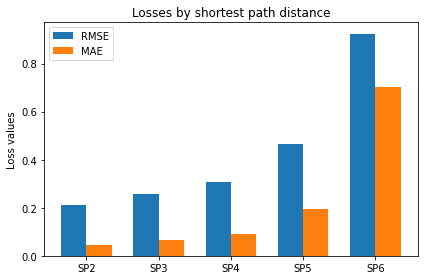

Embedding method:  harp_node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 49s - loss: 0.2086 - mae: 0.3421 - val_loss: 0.1015 - val_mae: 0.2221
Epoch 2/15
22371/22371 - 48s - loss: 0.1562 - mae: 0.2945 - val_loss: 0.0656 - val_mae: 0.1876
Epoch 3/15
22371/22371 - 49s - loss: 0.1479 - mae: 0.2850 - val_loss: 0.0691 - val_mae: 0.1941
Epoch 4/15
22371/22371 - 49s - loss: 0.1432 - mae: 0.2798 - val_loss: 0.0583 - val_mae: 0.1752
Epoch 5/15
22371/22371 - 48s - loss: 0.1405 - mae: 0.2769 - val_loss: 0.0570 - val_mae: 0.1706
Epoch 6/15
22371/22371 - 48s - loss: 0.1389 - mae: 0.2750 - val_loss: 0.0679 - val_mae: 0.1912
Epoch 7/15
22371/22371 - 48s - loss: 0.1367 - mae: 0.2724 - val_loss: 0.0754 - val_mae: 0.2004
Epoch 8/15
22371/22371 - 48s - loss: 0.1357 - mae: 0.2713 -

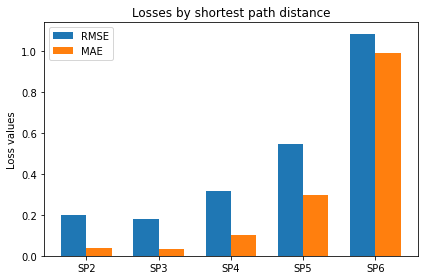

### EMBEDDING RUN sdne ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  sdne Binary operator: avg
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 128) Train y shape: (1022640,) 
 Test X shape: (109978, 128) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 33s - loss: 0.6805 - mae: 0.6314 - val_loss: 0.6408 - val_mae: 0.6311
Epoch 2/15
22371/22371 - 32s - loss: 0.5389 - mae: 0.5402 - val_loss: 0.4453 - val_mae: 0.4719
Epoch 3/15
22371/22371 - 36s - loss: 0.4896 - mae: 0.5043 - val_loss: 0.4693 - val_mae: 0.4933
Epoch 4/15
22371/22371 - 35s - loss: 0.4583 - mae: 0.4797 - val_loss: 0.3838 - val_mae: 0.4117
Epoch 5/15
22371/22371 - 36s - loss: 0.4383 - mae: 0.4632 - val_loss: 0.3487 - val_mae: 0.3852
Epoch 6/15
22371/22371 - 36s - loss: 0.4252 - mae: 0.4521 - val_loss: 0.3506 - val_mae: 0.3925
Epoch 7/15
22371/22371 - 36s - loss: 0.4140 - mae: 0.4429 - val_loss: 0.3756 - val_mae: 0.3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.58618103 0.90490736 0.61234839 0.1961998  0.12910938 0.        ]
F1 score: 	 [0.72633811 0.67814088 0.61921754 0.30725879 0.22371828 0.        ]
RMSE at length 2: 0.7097865413820544 MAE at length 2: 0.4437959968124502
RMSE at length 3: 0.30837094144699273 MAE at length 3: 0.09509263752890462
RMSE at length 4: 0.627282629636168 MAE at length 4: 0.38959557114482524
RMSE at length 5: 1.1409894463379893 MAE at length 5: 0.9696271771987909
RMSE at length 6: 1.9770046837137691 MAE at length 6: 1.7471607890017933


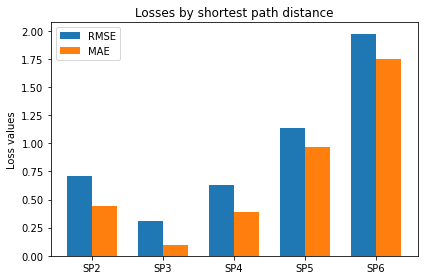

Embedding method:  sdne Binary operator: concat
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 256) Train y shape: (1022640,) 
 Test X shape: (109978, 256) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 39s - loss: 0.6117 - mae: 0.5833 - val_loss: 0.4357 - val_mae: 0.4744
Epoch 2/15
22371/22371 - 36s - loss: 0.4468 - mae: 0.4773 - val_loss: 0.3403 - val_mae: 0.3723
Epoch 3/15
22371/22371 - 39s - loss: 0.3898 - mae: 0.4370 - val_loss: 0.3031 - val_mae: 0.3504
Epoch 4/15
22371/22371 - 39s - loss: 0.3550 - mae: 0.4106 - val_loss: 0.2612 - val_mae: 0.3212
Epoch 5/15
22371/22371 - 39s - loss: 0.3317 - mae: 0.3910 - val_loss: 0.2777 - val_mae: 0.3244
Epoch 6/15
22371/22371 - 39s - loss: 0.3168 - mae: 0.3771 - val_loss: 0.2455 - val_mae: 0.2960
Epoch 7/15
22371/22371 - 39s - loss: 0.3035 - mae: 0.3650 - val_loss: 0.2255 - val_mae: 0.2739
Epoch 8/15
22371/22371 - 39s - loss: 0.2942 - mae: 0.3562 - val_loss: 0.2499 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.64229129 0.71255246 0.45598614 0.30070534 0.13030484
 0.        ]
F1 score: 	 [0.         0.73078308 0.59777988 0.47338057 0.33466838 0.13403013
 0.        ]
RMSE at length 2: 0.7590606465916566 MAE at length 2: 0.42757699339052174
RMSE at length 3: 0.5405955693619293 MAE at length 3: 0.28904621884724085
RMSE at length 4: 0.7913875249184988 MAE at length 4: 0.5714406457338461
RMSE at length 5: 1.1482207212972892 MAE at length 5: 0.9055707499640132
RMSE at length 6: 1.8487326235044923 MAE at length 6: 1.616258218768679


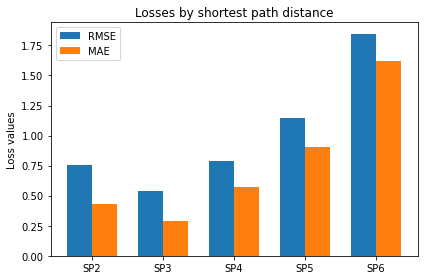

Embedding method:  sdne Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 49s - loss: 0.6597 - mae: 0.6201 - val_loss: 0.5296 - val_mae: 0.5115
Epoch 2/15
22371/22371 - 48s - loss: 0.5340 - mae: 0.5334 - val_loss: 0.4235 - val_mae: 0.4335
Epoch 3/15
22371/22371 - 48s - loss: 0.4930 - mae: 0.5038 - val_loss: 0.3886 - val_mae: 0.4007
Epoch 4/15
22371/22371 - 48s - loss: 0.4683 - mae: 0.4863 - val_loss: 0.3768 - val_mae: 0.4184
Epoch 5/15
22371/22371 - 49s - loss: 0.4488 - mae: 0.4709 - val_loss: 0.3419 - val_mae: 0.3676
Epoch 6/15
22371/22371 - 48s - loss: 0.4369 - mae: 0.4615 - val_loss: 0.3457 - val_mae: 0.3765
Epoch 7/15
22371/22371 - 49s - loss: 0.4248 - mae: 0.4521 - val_loss: 0.3394 - val_mae: 0.3557
Epoch 8/15
22371/22371 - 48s - loss: 0.4140 - mae: 0.4443 - val_loss

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.68290911 0.84061777 0.67971094 0.36764071 0.09503885
 0.        ]
F1 score: 	 [0.         0.77994004 0.70458461 0.66662522 0.45717354 0.14880674
 0.        ]
RMSE at length 2: 0.6754565150870162 MAE at length 2: 0.3627244175690245
RMSE at length 3: 0.4013665315363613 MAE at length 3: 0.15995318164949043
RMSE at length 4: 0.581083425168774 MAE at length 4: 0.32607868824747493
RMSE at length 5: 1.0135827224375116 MAE at length 5: 0.7630631927450698
RMSE at length 6: 1.919478909164058 MAE at length 6: 1.6939629408248655


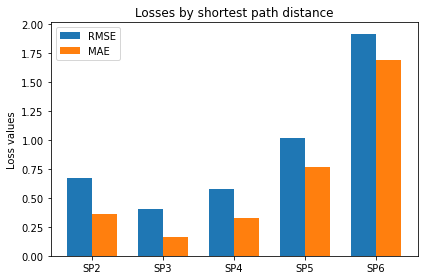

### EMBEDDING RUN line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  line Binary operator: avg
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 128) Train y shape: (1022640,) 
 Test X shape: (109978, 128) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 33s - loss: 0.4695 - mae: 0.5036 - val_loss: 0.2154 - val_mae: 0.3015
Epoch 2/15
22371/22371 - 36s - loss: 0.2899 - mae: 0.3799 - val_loss: 0.1875 - val_mae: 0.2720
Epoch 3/15
22371/22371 - 33s - loss: 0.2573 - mae: 0.3487 - val_loss: 0.1649 - val_mae: 0.2436
Epoch 4/15
22371/22371 - 32s - loss: 0.2426 - mae: 0.3324 - val_loss: 0.1556 - val_mae: 0.2327
Epoch 5/15
22371/22371 - 36s - loss: 0.2337 - mae: 0.3224 - val_loss: 0.1584 - val_mae: 0.2395
Epoch 6/15
22371/22371 - 36s - loss: 0.2271 - mae: 0.3145 - val_loss: 0.1441 - val_mae: 0.2067
Epoch 7/15
22371/22371 - 33s - loss: 0.2221 - mae: 0.3091 - val_loss: 0.1385 - val_mae: 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.58224347 0.93034343 0.68697967 0.51043616 0.10280932 0.        ]
F1 score: 	 [0.72937066 0.70303854 0.72048753 0.59169031 0.17105917 0.        ]
RMSE at length 2: 0.6648418751703176 MAE at length 2: 0.4258425912904889
RMSE at length 3: 0.26392531191673796 MAE at length 3: 0.06965657027034743
RMSE at length 4: 0.5618564864856438 MAE at length 4: 0.3139077885306174
RMSE at length 5: 0.8458231060006547 MAE at length 5: 0.5639844537210307
RMSE at length 6: 1.5035324017804956 MAE at length 6: 1.2743574417214585


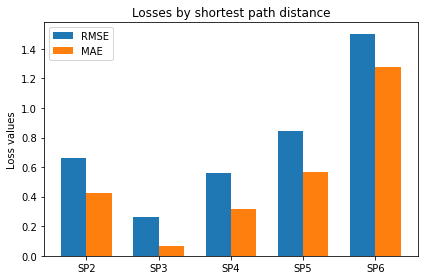

Embedding method:  line Binary operator: concat
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 256) Train y shape: (1022640,) 
 Test X shape: (109978, 256) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 36s - loss: 0.3881 - mae: 0.4416 - val_loss: 0.1833 - val_mae: 0.2644
Epoch 2/15
22371/22371 - 39s - loss: 0.2274 - mae: 0.3272 - val_loss: 0.1591 - val_mae: 0.2372
Epoch 3/15
22371/22371 - 39s - loss: 0.1936 - mae: 0.2938 - val_loss: 0.1368 - val_mae: 0.2057
Epoch 4/15
22371/22371 - 36s - loss: 0.1765 - mae: 0.2746 - val_loss: 0.1315 - val_mae: 0.2043
Epoch 5/15
22371/22371 - 36s - loss: 0.1666 - mae: 0.2629 - val_loss: 0.1293 - val_mae: 0.1917
Epoch 6/15
22371/22371 - 36s - loss: 0.1597 - mae: 0.2548 - val_loss: 0.1155 - val_mae: 0.1732
Epoch 7/15
22371/22371 - 39s - loss: 0.1548 - mae: 0.2491 - val_loss: 0.1153 - val_mae: 0.1787
Epoch 8/15
22371/22371 - 36s - loss: 0.1513 - mae: 0.2443 - val_loss: 0.1153 -

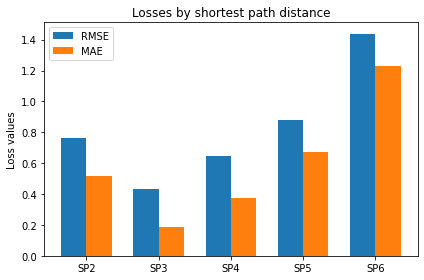

Embedding method:  line Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 50s - loss: 0.3427 - mae: 0.4168 - val_loss: 0.3531 - val_mae: 0.3879
Epoch 2/15
22371/22371 - 49s - loss: 0.2525 - mae: 0.3415 - val_loss: 0.1663 - val_mae: 0.2409
Epoch 3/15
22371/22371 - 50s - loss: 0.2369 - mae: 0.3245 - val_loss: 0.1600 - val_mae: 0.2504
Epoch 4/15
22371/22371 - 49s - loss: 0.2287 - mae: 0.3162 - val_loss: 0.1449 - val_mae: 0.2053
Epoch 5/15
22371/22371 - 49s - loss: 0.2230 - mae: 0.3106 - val_loss: 0.1499 - val_mae: 0.2200
Epoch 6/15
22371/22371 - 50s - loss: 0.2184 - mae: 0.3064 - val_loss: 0.1282 - val_mae: 0.1873
Epoch 7/15
22371/22371 - 49s - loss: 0.2147 - mae: 0.3030 - val_loss: 0.1343 - val_mae: 0.1996
Epoch 8/15
22371/22371 - 50s - loss: 0.2121 - mae: 0.3005 - val_loss

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.59583743 0.91701162 0.70012255 0.62818483 0.20502092
 0.        ]
F1 score: 	 [0.         0.73167362 0.70498639 0.74950235 0.68454902 0.29253731
 0.        ]
RMSE at length 2: 0.6566657160641965 MAE at length 2: 0.4130220784699761
RMSE at length 3: 0.28852263520910343 MAE at length 3: 0.08307402437979959
RMSE at length 4: 0.5535973414688935 MAE at length 4: 0.30207496936145034
RMSE at length 5: 0.7497420505504612 MAE at length 5: 0.434000287894055
RMSE at length 6: 1.423901512407114 MAE at length 6: 1.1273161984459055


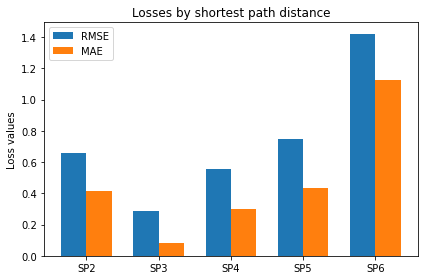

### EMBEDDING RUN harp_line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  harp_line Binary operator: avg
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 128) Train y shape: (1022640,) 
 Test X shape: (109978, 128) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 33s - loss: 0.4227 - mae: 0.4924 - val_loss: 0.1978 - val_mae: 0.3268
Epoch 2/15
22371/22371 - 36s - loss: 0.2696 - mae: 0.3882 - val_loss: 0.1439 - val_mae: 0.2680
Epoch 3/15
22371/22371 - 33s - loss: 0.2421 - mae: 0.3641 - val_loss: 0.1365 - val_mae: 0.2584
Epoch 4/15
22371/22371 - 33s - loss: 0.2289 - mae: 0.3528 - val_loss: 0.1285 - val_mae: 0.2560
Epoch 5/15
22371/22371 - 33s - loss: 0.2208 - mae: 0.3452 - val_loss: 0.1214 - val_mae: 0.2426
Epoch 6/15
22371/22371 - 36s - loss: 0.2149 - mae: 0.3400 - val_loss: 0.1087 - val_mae: 0.2232
Epoch 7/15
22371/22371 - 33s - loss: 0.2104 - mae: 0.3358 - val_loss: 0.1298 - va

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.90683448 0.88549488 0.74686219 0.31855477 0.118948  ]
F1 score: 	 [0.         0.94825072 0.8208426  0.70266187 0.41758656 0.21260684]
RMSE at length 2: 0.30546054640251336 MAE at length 2: 0.09321239394365537
RMSE at length 3: 0.3502017134671574 MAE at length 3: 0.11721716292215022
RMSE at length 4: 0.5036317413594859 MAE at length 4: 0.2533068503570976
RMSE at length 5: 0.8618391160004473 MAE at length 5: 0.7018857060601699
RMSE at length 6: 1.462215891654694 MAE at length 6: 1.3000597728631202


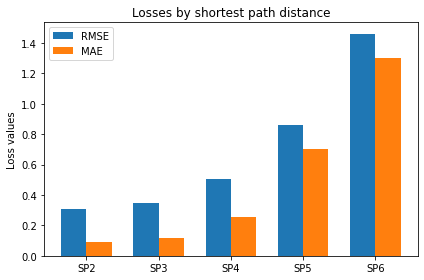

Embedding method:  harp_line Binary operator: concat
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 256) Train y shape: (1022640,) 
 Test X shape: (109978, 256) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 36s - loss: 0.2966 - mae: 0.3969 - val_loss: 0.0917 - val_mae: 0.2090
Epoch 2/15
22371/22371 - 36s - loss: 0.1521 - mae: 0.2819 - val_loss: 0.0662 - val_mae: 0.1639
Epoch 3/15
22371/22371 - 36s - loss: 0.1265 - mae: 0.2511 - val_loss: 0.0511 - val_mae: 0.1402
Epoch 4/15
22371/22371 - 36s - loss: 0.1142 - mae: 0.2343 - val_loss: 0.0498 - val_mae: 0.1333
Epoch 5/15
22371/22371 - 39s - loss: 0.1065 - mae: 0.2232 - val_loss: 0.0507 - val_mae: 0.1273
Epoch 6/15
22371/22371 - 39s - loss: 0.1012 - mae: 0.2154 - val_loss: 0.0446 - val_mae: 0.1218
Epoch 7/15
22371/22371 - 39s - loss: 0.0968 - mae: 0.2094 - val_loss: 0.0457 - val_mae: 0.1187
Epoch 8/15
22371/22371 - 39s - loss: 0.0940 - mae: 0.2050 - val_loss: 0.0

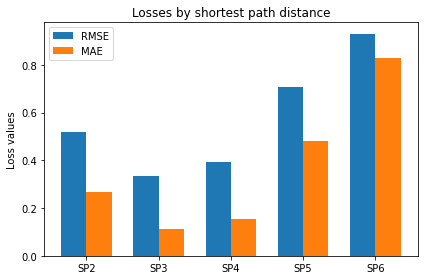

Embedding method:  harp_line Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 49s - loss: 0.3330 - mae: 0.4301 - val_loss: 0.1532 - val_mae: 0.2697
Epoch 2/15
22371/22371 - 49s - loss: 0.2493 - mae: 0.3675 - val_loss: 0.1599 - val_mae: 0.2711
Epoch 3/15
22371/22371 - 49s - loss: 0.2324 - mae: 0.3529 - val_loss: 0.1316 - val_mae: 0.2724
Epoch 4/15
22371/22371 - 48s - loss: 0.2225 - mae: 0.3446 - val_loss: 0.1194 - val_mae: 0.2344
Epoch 5/15
22371/22371 - 48s - loss: 0.2174 - mae: 0.3405 - val_loss: 0.1171 - val_mae: 0.2367
Epoch 6/15
22371/22371 - 49s - loss: 0.2130 - mae: 0.3364 - val_loss: 0.1123 - val_mae: 0.2386
Epoch 7/15
22371/22371 - 49s - loss: 0.2097 - mae: 0.3338 - val_loss: 0.1030 - val_mae: 0.2094
Epoch 8/15
22371/22371 - 48s - loss: 0.2066 - mae: 0.3313 - val

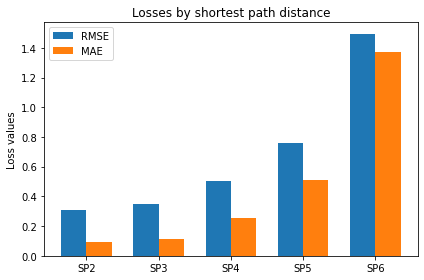

### LANDMARK RUN community_detection ###
Number of training pairs: 1046132
Path Lengths in train set:  [2 3 4 5 6]  Size of each length:  [385781 323792 228306  84610  23643]
Number of testing pairs: 114098
Path Lengths in test set:  [2 3 4 5 6]  Size of each length:  [43470 35253 22513  9335  3527]
### EMBEDDING RUN node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: avg
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 128) Train y shape: (1046132,) 
 Test X shape: (114098, 128) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 37s - loss: 0.2697 - mae: 0.3855 - val_loss: 0.0665 - val_mae: 0.1944
Epoch 2/15
22885/22885 - 34s - loss: 0.1551 - mae: 0.2942 - val_loss: 0.0493 - val_mae: 0.1580
Epoch 3/15
22885/22885 - 34s - loss: 0.1375 - mae: 0.2732 - val_loss: 0.0446 - val_mae: 0.1499
Epoch 4/15
22885/22885 - 34s - loss: 0.1289 - mae: 0.2624 - val_los

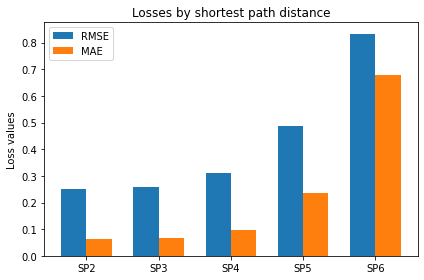

Embedding method:  node2vec Binary operator: concat
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 256) Train y shape: (1046132,) 
 Test X shape: (114098, 256) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 37s - loss: 0.1984 - mae: 0.3177 - val_loss: 0.0398 - val_mae: 0.1370
Epoch 2/15
22885/22885 - 37s - loss: 0.1067 - mae: 0.2382 - val_loss: 0.0359 - val_mae: 0.1268
Epoch 3/15
22885/22885 - 37s - loss: 0.0912 - mae: 0.2203 - val_loss: 0.0285 - val_mae: 0.1094
Epoch 4/15
22885/22885 - 39s - loss: 0.0834 - mae: 0.2104 - val_loss: 0.0297 - val_mae: 0.1092
Epoch 5/15
22885/22885 - 36s - loss: 0.0783 - mae: 0.2036 - val_loss: 0.0206 - val_mae: 0.0982
Epoch 6/15
22885/22885 - 39s - loss: 0.0745 - mae: 0.1981 - val_loss: 0.0292 - val_mae: 0.1171
Epoch 7/15
22885/22885 - 39s - loss: 0.0715 - mae: 0.1935 - val_loss: 0.0164 - val_mae: 0.0857
Epoch 8/15
22885/22885 - 37s - loss: 0.0696 - mae: 0.1904 - val_loss: 0.02

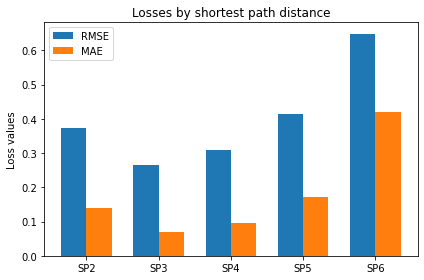

Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 2, 128, 1) Train y shape: (1046132,) 
 Test X shape: (114098, 2, 128, 1) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 50s - loss: 0.1916 - mae: 0.3200 - val_loss: 0.0562 - val_mae: 0.1740
Epoch 2/15
22885/22885 - 50s - loss: 0.1289 - mae: 0.2600 - val_loss: 0.0930 - val_mae: 0.2194
Epoch 3/15
22885/22885 - 50s - loss: 0.1200 - mae: 0.2480 - val_loss: 0.0456 - val_mae: 0.1573
Epoch 4/15
22885/22885 - 51s - loss: 0.1163 - mae: 0.2429 - val_loss: 0.0391 - val_mae: 0.1371
Epoch 5/15
22885/22885 - 50s - loss: 0.1135 - mae: 0.2393 - val_loss: 0.0710 - val_mae: 0.2030
Epoch 6/15
22885/22885 - 50s - loss: 0.1123 - mae: 0.2370 - val_loss: 0.0361 - val_mae: 0.1387
Epoch 7/15
22885/22885 - 50s - loss: 0.1101 - mae: 0.2342 - val_loss: 0.0430 - val_mae: 0.1503
Epoch 8/15
22885/22885 - 61s - loss: 0.1083 - mae: 0.2318 - val_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.78596733 0.93586361 0.92439924 0.93668988 0.74000567 0.        ]
F1 score: 	 [0.87950163 0.84017521 0.90319641 0.88780587 0.84493364 0.        ]
RMSE at length 2: 0.4626366459831941 MAE at length 2: 0.21403266620657924
RMSE at length 3: 0.25325162498163606 MAE at length 3: 0.06413638555583923
RMSE at length 4: 0.27495593101990085 MAE at length 4: 0.07560076400302047
RMSE at length 5: 0.2528890380378744 MAE at length 5: 0.06352437064809856
RMSE at length 6: 0.5165258747657502 MAE at length 6: 0.26226254607314997


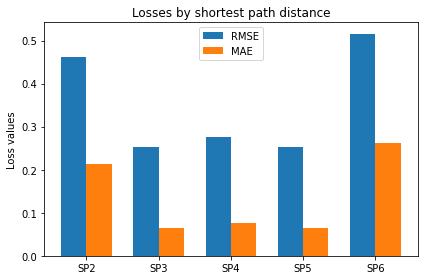

### EMBEDDING RUN harp_node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  harp_node2vec Binary operator: avg
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 128) Train y shape: (1046132,) 
 Test X shape: (114098, 128) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 37s - loss: 0.2913 - mae: 0.4059 - val_loss: 0.0888 - val_mae: 0.2286
Epoch 2/15
22885/22885 - 34s - loss: 0.1807 - mae: 0.3215 - val_loss: 0.0757 - val_mae: 0.1966
Epoch 3/15
22885/22885 - 36s - loss: 0.1638 - mae: 0.3032 - val_loss: 0.0636 - val_mae: 0.1823
Epoch 4/15
22885/22885 - 37s - loss: 0.1560 - mae: 0.2940 - val_loss: 0.0618 - val_mae: 0.1767
Epoch 5/15
22885/22885 - 33s - loss: 0.1499 - mae: 0.2869 - val_loss: 0.0572 - val_mae: 0.1753
Epoch 6/15
22885/22885 - 37s - loss: 0.1463 - mae: 0.2822 - val_loss: 0.0540 - val_mae: 0.1621
Epoch 7/15
22885/22885 - 34s - loss: 0.1422 - mae: 0.2776 - val_loss: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.95806303 0.93285678 0.86221294 0.57900375 0.22540403 0.        ]
F1 score: 	 [0.97594526 0.8983405  0.82542045 0.59608492 0.35658219 0.        ]
RMSE at length 2: 0.2062961125090507 MAE at length 2: 0.042144007361398665
RMSE at length 3: 0.2591200915665539 MAE at length 3: 0.06714322185345928
RMSE at length 4: 0.3711967892741425 MAE at length 4: 0.13778705636743216
RMSE at length 5: 0.8619803807246144 MAE at length 5: 0.5283342260310658
RMSE at length 6: 0.9608143224252478 MAE at length 6: 0.8239296852849447


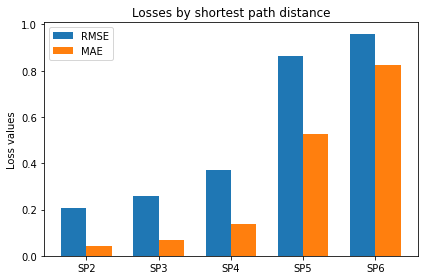

Embedding method:  harp_node2vec Binary operator: concat
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 256) Train y shape: (1046132,) 
 Test X shape: (114098, 256) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 39s - loss: 0.2051 - mae: 0.3265 - val_loss: 0.0467 - val_mae: 0.1452
Epoch 2/15
22885/22885 - 39s - loss: 0.1125 - mae: 0.2470 - val_loss: 0.0332 - val_mae: 0.1246
Epoch 3/15
22885/22885 - 37s - loss: 0.0973 - mae: 0.2271 - val_loss: 0.0294 - val_mae: 0.1117
Epoch 4/15
22885/22885 - 39s - loss: 0.0886 - mae: 0.2139 - val_loss: 0.0264 - val_mae: 0.0997
Epoch 5/15
22885/22885 - 37s - loss: 0.0818 - mae: 0.2035 - val_loss: 0.0249 - val_mae: 0.1016
Epoch 6/15
22885/22885 - 37s - loss: 0.0780 - mae: 0.1965 - val_loss: 0.0198 - val_mae: 0.0855
Epoch 7/15
22885/22885 - 39s - loss: 0.0746 - mae: 0.1911 - val_loss: 0.0190 - val_mae: 0.0789
Epoch 8/15
22885/22885 - 37s - loss: 0.0724 - mae: 0.1867 - val_loss:

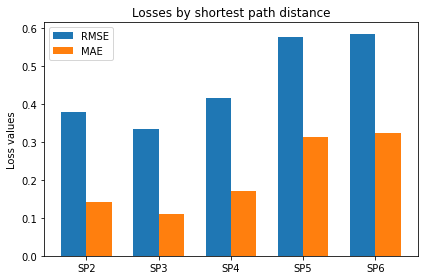

Embedding method:  harp_node2vec Binary operator: conv
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 2, 128, 1) Train y shape: (1046132,) 
 Test X shape: (114098, 2, 128, 1) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 50s - loss: 0.2186 - mae: 0.3503 - val_loss: 0.0746 - val_mae: 0.2066
Epoch 2/15
22885/22885 - 49s - loss: 0.1579 - mae: 0.2962 - val_loss: 0.0823 - val_mae: 0.2105
Epoch 3/15
22885/22885 - 49s - loss: 0.1485 - mae: 0.2848 - val_loss: 0.0672 - val_mae: 0.1898
Epoch 4/15
22885/22885 - 49s - loss: 0.1429 - mae: 0.2784 - val_loss: 0.0799 - val_mae: 0.2112
Epoch 5/15
22885/22885 - 49s - loss: 0.1401 - mae: 0.2737 - val_loss: 0.0525 - val_mae: 0.1632
Epoch 6/15
22885/22885 - 49s - loss: 0.1374 - mae: 0.2696 - val_loss: 0.0697 - val_mae: 0.2027
Epoch 7/15
22885/22885 - 49s - loss: 0.1357 - mae: 0.2669 - val_loss: 0.0758 - val_mae: 0.2087
Epoch 8/15
22885/22885 - 49s - loss: 0.1339 - mae: 0.2648 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.8852772  0.91285848 0.84866522 0.93701125 0.30535866
 0.        ]
F1 score: 	 [0.         0.92601817 0.86328214 0.86849402 0.80435882 0.45356917
 0.        ]
RMSE at length 2: 0.33911480324730514 MAE at length 2: 0.11481481481481481
RMSE at length 3: 0.2951974252439362 MAE at length 3: 0.0871415198706493
RMSE at length 4: 0.3907266918891396 MAE at length 4: 0.1517789721494248
RMSE at length 5: 0.2591651546734117 MAE at length 5: 0.0643813604713444
RMSE at length 6: 0.8461122082859285 MAE at length 6: 0.7017295151686986


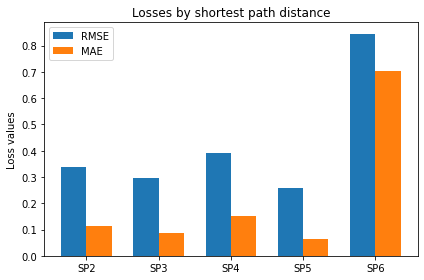

### EMBEDDING RUN sdne ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  sdne Binary operator: avg
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 128) Train y shape: (1046132,) 
 Test X shape: (114098, 128) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 34s - loss: 0.7861 - mae: 0.6879 - val_loss: 0.6185 - val_mae: 0.5929
Epoch 2/15
22885/22885 - 34s - loss: 0.6365 - mae: 0.6013 - val_loss: 0.5310 - val_mae: 0.5312
Epoch 3/15
22885/22885 - 37s - loss: 0.5823 - mae: 0.5626 - val_loss: 0.6076 - val_mae: 0.5526
Epoch 4/15
22885/22885 - 34s - loss: 0.5502 - mae: 0.5382 - val_loss: 0.4731 - val_mae: 0.4947
Epoch 5/15
22885/22885 - 38s - loss: 0.5267 - mae: 0.5201 - val_loss: 0.4973 - val_mae: 0.5236
Epoch 6/15
22885/22885 - 34s - loss: 0.5089 - mae: 0.5065 - val_loss: 0.4400 - val_mae: 0.4399
Epoch 7/15
22885/22885 - 33s - loss: 0.4966 - mae: 0.4959 - val_loss: 0.4121 - val_mae: 0.4

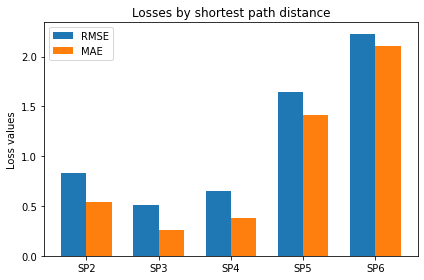

Embedding method:  sdne Binary operator: concat
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 256) Train y shape: (1046132,) 
 Test X shape: (114098, 256) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 40s - loss: 0.7035 - mae: 0.6345 - val_loss: 0.5889 - val_mae: 0.5472
Epoch 2/15
22885/22885 - 39s - loss: 0.5333 - mae: 0.5314 - val_loss: 0.4331 - val_mae: 0.4544
Epoch 3/15
22885/22885 - 36s - loss: 0.4722 - mae: 0.4877 - val_loss: 0.4608 - val_mae: 0.4938
Epoch 4/15
22885/22885 - 39s - loss: 0.4391 - mae: 0.4624 - val_loss: 0.3754 - val_mae: 0.3954
Epoch 5/15
22885/22885 - 37s - loss: 0.4171 - mae: 0.4446 - val_loss: 0.3526 - val_mae: 0.3709
Epoch 6/15
22885/22885 - 39s - loss: 0.4007 - mae: 0.4313 - val_loss: 0.3319 - val_mae: 0.3756
Epoch 7/15
22885/22885 - 37s - loss: 0.3883 - mae: 0.4205 - val_loss: 0.3081 - val_mae: 0.3256
Epoch 8/15
22885/22885 - 39s - loss: 0.3771 - mae: 0.4112 - val_loss: 0.3045 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.48148148 0.58528352 0.41873584 0.1431173  0.020981   0.        ]
F1 score: 	 [0.61846227 0.46972715 0.35482535 0.17633472 0.03507109 0.        ]
RMSE at length 2: 0.963445049293924 MAE at length 2: 0.6365309408787669
RMSE at length 3: 0.6758998095702392 MAE at length 3: 0.4287578362125209
RMSE at length 4: 0.8002686884996312 MAE at length 4: 0.6009860969217785
RMSE at length 5: 1.4475289696016798 MAE at length 5: 1.2674879485806105
RMSE at length 6: 1.957081316904163 MAE at length 6: 1.889707967110859


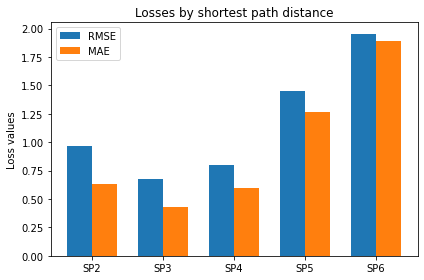

Embedding method:  sdne Binary operator: conv
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 2, 128, 1) Train y shape: (1046132,) 
 Test X shape: (114098, 2, 128, 1) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 50s - loss: 0.8144 - mae: 0.7012 - val_loss: 0.7848 - val_mae: 0.6977
Epoch 2/15
22885/22885 - 49s - loss: 0.7810 - mae: 0.6816 - val_loss: 0.7836 - val_mae: 0.6494
Epoch 3/15
22885/22885 - 49s - loss: 0.6846 - mae: 0.6269 - val_loss: 0.5580 - val_mae: 0.5449
Epoch 4/15
22885/22885 - 49s - loss: 0.6101 - mae: 0.5763 - val_loss: 0.4916 - val_mae: 0.4946
Epoch 5/15
22885/22885 - 49s - loss: 0.5709 - mae: 0.5469 - val_loss: 0.4526 - val_mae: 0.4458
Epoch 6/15
22885/22885 - 49s - loss: 0.5491 - mae: 0.5298 - val_loss: 0.4378 - val_mae: 0.4293
Epoch 7/15
22885/22885 - 49s - loss: 0.5314 - mae: 0.5158 - val_loss: 0.4117 - val_mae: 0.4160
Epoch 8/15
22885/22885 - 50s - loss: 0.5160 - mae: 0.5041 - val_loss

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.57055441 0.77542337 0.29858304 0.08205678 0.        ]
F1 score: 	 [0.         0.66072594 0.55111237 0.33743286 0.1452408  0.        ]
RMSE at length 2: 0.7855375504431342 MAE at length 2: 0.4910973084886128
RMSE at length 3: 0.4754190963397417 MAE at length 3: 0.22505886023884492
RMSE at length 4: 0.8786596722873827 MAE at length 4: 0.7249589126282592
RMSE at length 5: 1.9017371474063887 MAE at length 5: 1.6686663095875736
RMSE at length 6: 2.729876496758262 MAE at length 6: 2.657215764105472


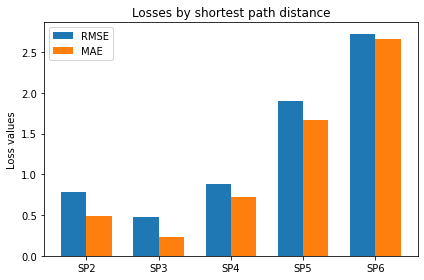

### EMBEDDING RUN line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  line Binary operator: avg
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 128) Train y shape: (1046132,) 
 Test X shape: (114098, 128) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 33s - loss: 0.5581 - mae: 0.5520 - val_loss: 0.3086 - val_mae: 0.3695
Epoch 2/15
22885/22885 - 33s - loss: 0.3751 - mae: 0.4350 - val_loss: 0.2514 - val_mae: 0.3127
Epoch 3/15
22885/22885 - 36s - loss: 0.3273 - mae: 0.3983 - val_loss: 0.2168 - val_mae: 0.2706
Epoch 4/15
22885/22885 - 37s - loss: 0.2986 - mae: 0.3747 - val_loss: 0.2087 - val_mae: 0.2701
Epoch 5/15
22885/22885 - 36s - loss: 0.2812 - mae: 0.3593 - val_loss: 0.1872 - val_mae: 0.2506
Epoch 6/15
22885/22885 - 36s - loss: 0.2709 - mae: 0.3493 - val_loss: 0.1740 - val_mae: 0.2364
Epoch 7/15
22885/22885 - 37s - loss: 0.2621 - mae: 0.3417 - val_loss: 0.1934 - val_mae: 0.2

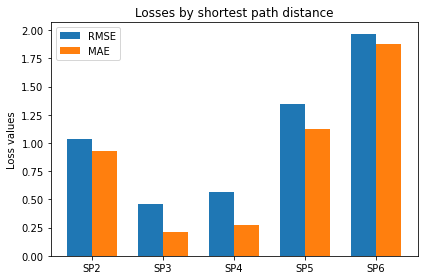

Embedding method:  line Binary operator: concat
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 256) Train y shape: (1046132,) 
 Test X shape: (114098, 256) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 36s - loss: 0.4599 - mae: 0.4813 - val_loss: 0.2539 - val_mae: 0.3162
Epoch 2/15
22885/22885 - 36s - loss: 0.2842 - mae: 0.3622 - val_loss: 0.1735 - val_mae: 0.2419
Epoch 3/15
22885/22885 - 39s - loss: 0.2380 - mae: 0.3203 - val_loss: 0.1549 - val_mae: 0.2198
Epoch 4/15
22885/22885 - 40s - loss: 0.2119 - mae: 0.2945 - val_loss: 0.1440 - val_mae: 0.1974
Epoch 5/15
22885/22885 - 40s - loss: 0.1969 - mae: 0.2795 - val_loss: 0.2377 - val_mae: 0.3160
Epoch 6/15
22885/22885 - 39s - loss: 0.1864 - mae: 0.2690 - val_loss: 0.1250 - val_mae: 0.1775
Epoch 7/15
22885/22885 - 36s - loss: 0.1786 - mae: 0.2614 - val_loss: 0.1114 - val_mae: 0.1586
Epoch 8/15
22885/22885 - 37s - loss: 0.1725 - mae: 0.2553 - val_loss: 0.1074 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.08148148 0.65770289 0.36023631 0.16979111 0.03742557 0.        ]
F1 score: 	 [0.14097512 0.43317266 0.36029232 0.17703563 0.03368206 0.        ]
RMSE at length 2: 1.349181179483491 MAE at length 2: 1.1369220151828847
RMSE at length 3: 0.9407759709763256 MAE at length 3: 0.4929793209088588
RMSE at length 4: 0.949485947322512 MAE at length 4: 0.7238484431217519
RMSE at length 5: 1.7927724920791401 MAE at length 5: 1.4773433315479378
RMSE at length 6: 2.4415480315720783 MAE at length 6: 2.3149985823646158


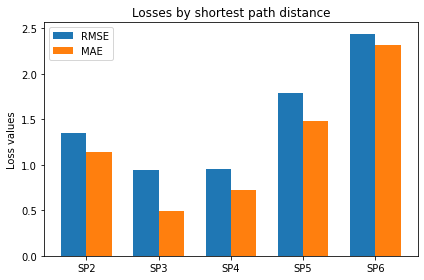

Embedding method:  line Binary operator: conv
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 2, 128, 1) Train y shape: (1046132,) 
 Test X shape: (114098, 2, 128, 1) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 50s - loss: 0.4381 - mae: 0.4734 - val_loss: 0.2429 - val_mae: 0.3016
Epoch 2/15
22885/22885 - 50s - loss: 0.3234 - mae: 0.3900 - val_loss: 0.2351 - val_mae: 0.2910
Epoch 3/15
22885/22885 - 50s - loss: 0.2952 - mae: 0.3674 - val_loss: 0.1999 - val_mae: 0.2731
Epoch 4/15
22885/22885 - 50s - loss: 0.2796 - mae: 0.3552 - val_loss: 0.4159 - val_mae: 0.4882
Epoch 5/15
22885/22885 - 50s - loss: 0.2705 - mae: 0.3474 - val_loss: 0.2115 - val_mae: 0.2934
Epoch 6/15
22885/22885 - 50s - loss: 0.2625 - mae: 0.3402 - val_loss: 0.2368 - val_mae: 0.2859
Epoch 7/15
22885/22885 - 50s - loss: 0.2589 - mae: 0.3366 - val_loss: 0.1696 - val_mae: 0.2308
Epoch 8/15
22885/22885 - 50s - loss: 0.2547 - mae: 0.3328 - val_loss

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.2478721  0.94182055 0.47714654 0.15254419 0.01162461]
F1 score: 	 [0.         0.3837524  0.58662332 0.49520561 0.23964995 0.02295633]
RMSE at length 2: 0.9714938610517266 MAE at length 2: 0.8151138716356108
RMSE at length 3: 0.296156795420895 MAE at length 3: 0.06802257963861232
RMSE at length 4: 0.7656044829511125 MAE at length 4: 0.543952383067561
RMSE at length 5: 1.6146755989268198 MAE at length 5: 1.356614890198179
RMSE at length 6: 2.3069648370284086 MAE at length 6: 2.2072582931669973


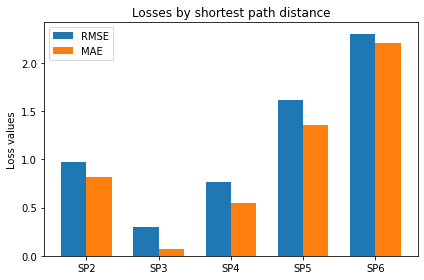

### EMBEDDING RUN harp_line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  harp_line Binary operator: avg
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 128) Train y shape: (1046132,) 
 Test X shape: (114098, 128) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 37s - loss: 0.4294 - mae: 0.4931 - val_loss: 0.1835 - val_mae: 0.3124
Epoch 2/15
22885/22885 - 37s - loss: 0.2774 - mae: 0.3921 - val_loss: 0.1573 - val_mae: 0.2751
Epoch 3/15
22885/22885 - 37s - loss: 0.2496 - mae: 0.3675 - val_loss: 0.1387 - val_mae: 0.2697
Epoch 4/15
22885/22885 - 37s - loss: 0.2357 - mae: 0.3542 - val_loss: 0.1253 - val_mae: 0.2416
Epoch 5/15
22885/22885 - 37s - loss: 0.2266 - mae: 0.3447 - val_loss: 0.1209 - val_mae: 0.2376
Epoch 6/15
22885/22885 - 33s - loss: 0.2194 - mae: 0.3381 - val_loss: 0.1078 - val_mae: 0.2182
Epoch 7/15
22885/22885 - 33s - loss: 0.2156 - mae: 0.3334 - val_loss: 0.1029 - va

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.48884288 0.88869032 0.74592458 0.52437065 0.00170116]
F1 score: 	 [0.         0.65635038 0.6695733  0.69179592 0.55151822 0.00339559]
RMSE at length 2: 0.7155314648585822 MAE at length 2: 0.5114331723027375
RMSE at length 3: 0.3347768929253673 MAE at length 3: 0.11156497319377075
RMSE at length 4: 0.5041911139931592 MAE at length 4: 0.25411984186914227
RMSE at length 5: 0.7494329225552799 MAE at length 5: 0.5033743974290306
RMSE at length 6: 1.4168174561310753 MAE at length 6: 1.3314431528210944


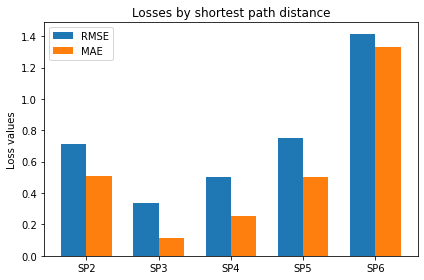

Embedding method:  harp_line Binary operator: concat
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 256) Train y shape: (1046132,) 
 Test X shape: (114098, 256) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 37s - loss: 0.3100 - mae: 0.4047 - val_loss: 0.1015 - val_mae: 0.2149
Epoch 2/15
22885/22885 - 37s - loss: 0.1589 - mae: 0.2876 - val_loss: 0.0805 - val_mae: 0.1845
Epoch 3/15
22885/22885 - 37s - loss: 0.1312 - mae: 0.2571 - val_loss: 0.0650 - val_mae: 0.1750
Epoch 4/15
22885/22885 - 37s - loss: 0.1192 - mae: 0.2423 - val_loss: 0.0721 - val_mae: 0.1719
Epoch 5/15
22885/22885 - 39s - loss: 0.1117 - mae: 0.2328 - val_loss: 0.0657 - val_mae: 0.1639
Epoch 6/15
22885/22885 - 36s - loss: 0.1059 - mae: 0.2259 - val_loss: 0.0551 - val_mae: 0.1509
Epoch 7/15
22885/22885 - 37s - loss: 0.1026 - mae: 0.2215 - val_loss: 0.0530 - val_mae: 0.1411
Epoch 8/15
22885/22885 - 39s - loss: 0.0995 - mae: 0.2178 - val_loss: 0.0

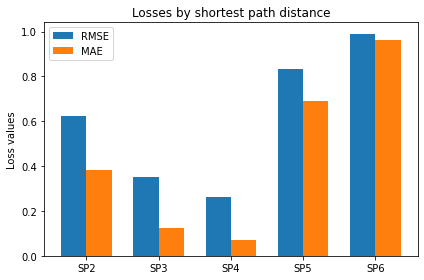

Embedding method:  harp_line Binary operator: conv
Embedded training set size: 1046132
Embedded test set size: 114098
Train test split summary: 
 Train X shape: (1046132, 2, 128, 1) Train y shape: (1046132,) 
 Test X shape: (114098, 2, 128, 1) Test y shape: (114098,)




Epoch 1/15
22885/22885 - 50s - loss: 0.3438 - mae: 0.4368 - val_loss: 0.1585 - val_mae: 0.2765
Epoch 2/15
22885/22885 - 50s - loss: 0.2542 - mae: 0.3700 - val_loss: 0.1277 - val_mae: 0.2479
Epoch 3/15
22885/22885 - 50s - loss: 0.2356 - mae: 0.3544 - val_loss: 0.1641 - val_mae: 0.2854
Epoch 4/15
22885/22885 - 50s - loss: 0.2258 - mae: 0.3456 - val_loss: 0.1480 - val_mae: 0.2997
Epoch 5/15
22885/22885 - 50s - loss: 0.2194 - mae: 0.3401 - val_loss: 0.1169 - val_mae: 0.2439
Epoch 6/15
22885/22885 - 50s - loss: 0.2142 - mae: 0.3359 - val_loss: 0.1033 - val_mae: 0.2232
Epoch 7/15
22885/22885 - 50s - loss: 0.2102 - mae: 0.3326 - val_loss: 0.1116 - val_mae: 0.2358
Epoch 8/15
22885/22885 - 50s - loss: 0.2067 - mae: 0.3296 - val

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.81729929 0.91186566 0.70212766 0.28923407 0.        ]
F1 score: 	 [0.         0.89660568 0.78846225 0.65389786 0.3477141  0.        ]
RMSE at length 2: 0.4303314829119352 MAE at length 2: 0.18352887048539224
RMSE at length 3: 0.29801868448212554 MAE at length 3: 0.08836127421779706
RMSE at length 4: 0.5485774660551527 MAE at length 4: 0.29889397237151866
RMSE at length 5: 0.978231190149801 MAE at length 5: 0.7893947509373326
RMSE at length 6: 1.4179176639857922 MAE at length 6: 1.332293734051602


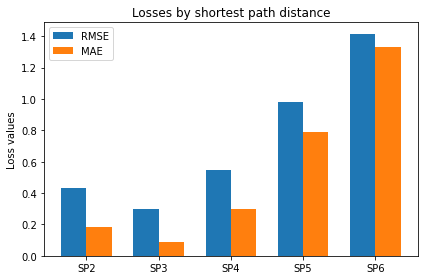

### LANDMARK RUN coarsening ###
Number of training pairs: 1104965
Path Lengths in train set:  [2 3 4 5 6]  Size of each length:  [388702 331393 241722 109961  33187]
Number of testing pairs: 117849
Path Lengths in test set:  [2 3 4 5 6]  Size of each length:  [43773 36362 23953 10096  3665]
### EMBEDDING RUN node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: avg
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 128) Train y shape: (1104965,) 
 Test X shape: (117849, 128) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 39s - loss: 0.2771 - mae: 0.3913 - val_loss: 0.0746 - val_mae: 0.1985
Epoch 2/15
24172/24172 - 38s - loss: 0.1669 - mae: 0.3058 - val_loss: 0.0524 - val_mae: 0.1657
Epoch 3/15
24172/24172 - 38s - loss: 0.1507 - mae: 0.2876 - val_loss: 0.0453 - val_mae: 0.1569
Epoch 4/15
24172/24172 - 35s - loss: 0.1434 - mae: 0.2780 - val_loss: 0.0419

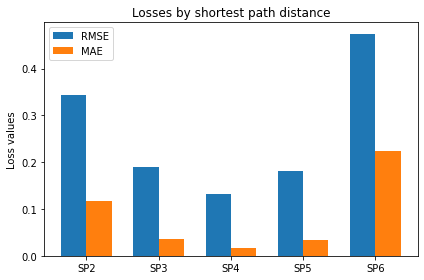

Embedding method:  node2vec Binary operator: concat
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 256) Train y shape: (1104965,) 
 Test X shape: (117849, 256) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 39s - loss: 0.1997 - mae: 0.3205 - val_loss: 0.0368 - val_mae: 0.1275
Epoch 2/15
24172/24172 - 38s - loss: 0.1085 - mae: 0.2433 - val_loss: 0.0364 - val_mae: 0.1318
Epoch 3/15
24172/24172 - 41s - loss: 0.0951 - mae: 0.2275 - val_loss: 0.0316 - val_mae: 0.1176
Epoch 4/15
24172/24172 - 39s - loss: 0.0878 - mae: 0.2177 - val_loss: 0.0228 - val_mae: 0.0951
Epoch 5/15
24172/24172 - 41s - loss: 0.0830 - mae: 0.2105 - val_loss: 0.0264 - val_mae: 0.1067
Epoch 6/15
24172/24172 - 39s - loss: 0.0799 - mae: 0.2051 - val_loss: 0.0286 - val_mae: 0.1138
Epoch 7/15
24172/24172 - 39s - loss: 0.0766 - mae: 0.2005 - val_loss: 0.0283 - val_mae: 0.1114
Epoch 8/15
24172/24172 - 41s - loss: 0.0749 - mae: 0.1975 - val_loss: 0.02

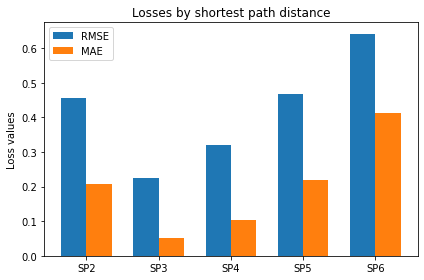

Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 2, 128, 1) Train y shape: (1104965,) 
 Test X shape: (117849, 2, 128, 1) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 53s - loss: 0.1897 - mae: 0.3225 - val_loss: 0.0587 - val_mae: 0.1827
Epoch 2/15
24172/24172 - 62s - loss: 0.1337 - mae: 0.2663 - val_loss: 0.0428 - val_mae: 0.1519
Epoch 3/15
24172/24172 - 52s - loss: 0.1246 - mae: 0.2546 - val_loss: 0.0332 - val_mae: 0.1281
Epoch 4/15
24172/24172 - 52s - loss: 0.1205 - mae: 0.2489 - val_loss: 0.0458 - val_mae: 0.1550
Epoch 5/15
24172/24172 - 52s - loss: 0.1186 - mae: 0.2458 - val_loss: 0.0389 - val_mae: 0.1386
Epoch 6/15
24172/24172 - 53s - loss: 0.1162 - mae: 0.2425 - val_loss: 0.0398 - val_mae: 0.1483
Epoch 7/15
24172/24172 - 62s - loss: 0.1149 - mae: 0.2407 - val_loss: 0.0648 - val_mae: 0.1875
Epoch 8/15
24172/24172 - 52s - loss: 0.1131 - mae: 0.2383 - val_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.7662486  0.96199329 0.9801695  0.98415214 0.82892224 0.        ]
F1 score: 	 [0.86734245 0.85419159 0.96042216 0.95515501 0.89921563 0.        ]
RMSE at length 2: 0.48347843722795614 MAE at length 2: 0.23375139926438673
RMSE at length 3: 0.1949530976977888 MAE at length 3: 0.038006710301963585
RMSE at length 4: 0.14082081308731392 MAE at length 4: 0.019830501398572203
RMSE at length 5: 0.12588828594761015 MAE at length 5: 0.01584786053882726
RMSE at length 6: 0.41361547676479954 MAE at length 6: 0.17107776261937244


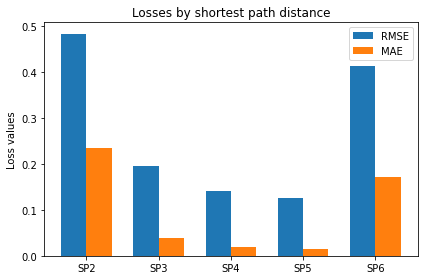

### EMBEDDING RUN harp_node2vec ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  harp_node2vec Binary operator: avg
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 128) Train y shape: (1104965,) 
 Test X shape: (117849, 128) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 35s - loss: 0.3037 - mae: 0.4164 - val_loss: 0.0980 - val_mae: 0.2325
Epoch 2/15
24172/24172 - 35s - loss: 0.1839 - mae: 0.3265 - val_loss: 0.0651 - val_mae: 0.1858
Epoch 3/15
24172/24172 - 38s - loss: 0.1645 - mae: 0.3060 - val_loss: 0.0632 - val_mae: 0.1806
Epoch 4/15
24172/24172 - 38s - loss: 0.1551 - mae: 0.2948 - val_loss: 0.0492 - val_mae: 0.1593
Epoch 5/15
24172/24172 - 35s - loss: 0.1496 - mae: 0.2878 - val_loss: 0.0517 - val_mae: 0.1645
Epoch 6/15
24172/24172 - 35s - loss: 0.1453 - mae: 0.2827 - val_loss: 0.0508 - val_mae: 0.1595
Epoch 7/15
24172/24172 - 37s - loss: 0.1429 - mae: 0.2793 - val_loss: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.88645969 0.93589462 0.9643051  0.95948891 0.76043656 0.        ]
F1 score: 	 [0.93861951 0.89989819 0.93116446 0.91236167 0.85359877 0.        ]
RMSE at length 2: 0.3370591129689826 MAE at length 2: 0.11356315536974848
RMSE at length 3: 0.253190412026825 MAE at length 3: 0.0641053847423134
RMSE at length 4: 0.18893094642601557 MAE at length 4: 0.03569490251742997
RMSE at length 5: 0.20127367811608446 MAE at length 5: 0.04051109350237718
RMSE at length 6: 0.4911217218802199 MAE at length 6: 0.24010914051841747


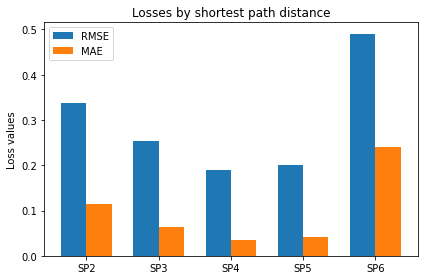

Embedding method:  harp_node2vec Binary operator: concat
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 256) Train y shape: (1104965,) 
 Test X shape: (117849, 256) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 39s - loss: 0.2111 - mae: 0.3305 - val_loss: 0.0429 - val_mae: 0.1379
Epoch 2/15
24172/24172 - 38s - loss: 0.1199 - mae: 0.2560 - val_loss: 0.0357 - val_mae: 0.1281
Epoch 3/15
24172/24172 - 38s - loss: 0.1065 - mae: 0.2405 - val_loss: 0.0336 - val_mae: 0.1205
Epoch 4/15
24172/24172 - 41s - loss: 0.0992 - mae: 0.2315 - val_loss: 0.0330 - val_mae: 0.1201
Epoch 5/15
24172/24172 - 38s - loss: 0.0947 - mae: 0.2256 - val_loss: 0.0346 - val_mae: 0.1350
Epoch 6/15
24172/24172 - 41s - loss: 0.0913 - mae: 0.2211 - val_loss: 0.0295 - val_mae: 0.1115
Epoch 7/15
24172/24172 - 40s - loss: 0.0892 - mae: 0.2181 - val_loss: 0.0317 - val_mae: 0.1171
Epoch 8/15
24172/24172 - 41s - loss: 0.0867 - mae: 0.2151 - val_loss:

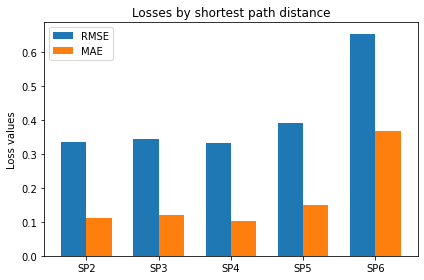

Embedding method:  harp_node2vec Binary operator: conv
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 2, 128, 1) Train y shape: (1104965,) 
 Test X shape: (117849, 2, 128, 1) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 52s - loss: 0.2262 - mae: 0.3559 - val_loss: 0.0768 - val_mae: 0.2083
Epoch 2/15
24172/24172 - 62s - loss: 0.1663 - mae: 0.3016 - val_loss: 0.0940 - val_mae: 0.2353
Epoch 3/15
24172/24172 - 52s - loss: 0.1563 - mae: 0.2902 - val_loss: 0.0865 - val_mae: 0.2249
Epoch 4/15
24172/24172 - 51s - loss: 0.1507 - mae: 0.2835 - val_loss: 0.0755 - val_mae: 0.2046
Epoch 5/15
24172/24172 - 52s - loss: 0.1472 - mae: 0.2793 - val_loss: 0.0676 - val_mae: 0.1948
Epoch 6/15
24172/24172 - 52s - loss: 0.1445 - mae: 0.2763 - val_loss: 0.0804 - val_mae: 0.2105
Epoch 7/15
24172/24172 - 62s - loss: 0.1433 - mae: 0.2746 - val_loss: 0.1034 - val_mae: 0.2478
Epoch 8/15
24172/24172 - 52s - loss: 0.1410 - mae: 0.2721 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.83775387 0.92258402 0.97340625 0.96513471 0.81746248 0.        ]
F1 score: 	 [0.91106943 0.86776688 0.92783382 0.93674293 0.88117647 0.        ]
RMSE at length 2: 0.40458049487149805 MAE at length 2: 0.1627258812509995
RMSE at length 3: 0.27882969456271267 MAE at length 3: 0.07752598866949012
RMSE at length 4: 0.16307589057271848 MAE at length 4: 0.02659374608608525
RMSE at length 5: 0.18751650746140452 MAE at length 5: 0.03496434231378764
RMSE at length 6: 0.43010833369931223 MAE at length 6: 0.18335607094133696


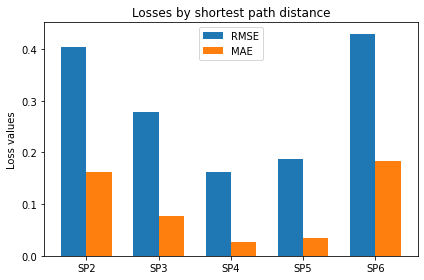

### EMBEDDING RUN sdne ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  sdne Binary operator: avg
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 128) Train y shape: (1104965,) 
 Test X shape: (117849, 128) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 36s - loss: 0.8560 - mae: 0.7286 - val_loss: 0.7106 - val_mae: 0.6505
Epoch 2/15
24172/24172 - 35s - loss: 0.7603 - mae: 0.6736 - val_loss: 0.7502 - val_mae: 0.6467
Epoch 3/15
24172/24172 - 35s - loss: 0.7400 - mae: 0.6595 - val_loss: 0.7547 - val_mae: 0.6669
Epoch 4/15
24172/24172 - 36s - loss: 0.7297 - mae: 0.6514 - val_loss: 0.6855 - val_mae: 0.6199
Epoch 5/15
24172/24172 - 38s - loss: 0.7178 - mae: 0.6419 - val_loss: 0.6627 - val_mae: 0.6119
Epoch 6/15
24172/24172 - 38s - loss: 0.7103 - mae: 0.6356 - val_loss: 0.6465 - val_mae: 0.5853
Epoch 7/15
24172/24172 - 38s - loss: 0.7039 - mae: 0.6308 - val_loss: 0.7049 - val_mae: 0.6

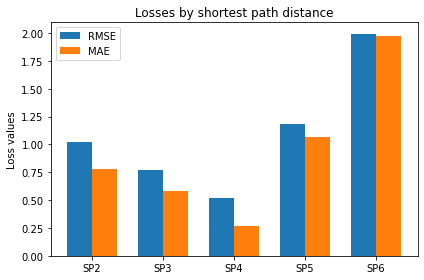

Embedding method:  sdne Binary operator: concat
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 256) Train y shape: (1104965,) 
 Test X shape: (117849, 256) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 39s - loss: 0.7983 - mae: 0.6926 - val_loss: 0.6951 - val_mae: 0.6278
Epoch 2/15
24172/24172 - 41s - loss: 0.6997 - mae: 0.6326 - val_loss: 0.6482 - val_mae: 0.5938
Epoch 3/15
24172/24172 - 39s - loss: 0.6739 - mae: 0.6138 - val_loss: 0.6137 - val_mae: 0.5720
Epoch 4/15
24172/24172 - 39s - loss: 0.6558 - mae: 0.6010 - val_loss: 0.5991 - val_mae: 0.5579
Epoch 5/15
24172/24172 - 41s - loss: 0.6418 - mae: 0.5908 - val_loss: 0.5867 - val_mae: 0.5486
Epoch 6/15
24172/24172 - 39s - loss: 0.6301 - mae: 0.5822 - val_loss: 0.5970 - val_mae: 0.5496
Epoch 7/15
24172/24172 - 39s - loss: 0.6217 - mae: 0.5755 - val_loss: 0.5655 - val_mae: 0.5268
Epoch 8/15
24172/24172 - 41s - loss: 0.6148 - mae: 0.5701 - val_loss: 0.6051 -

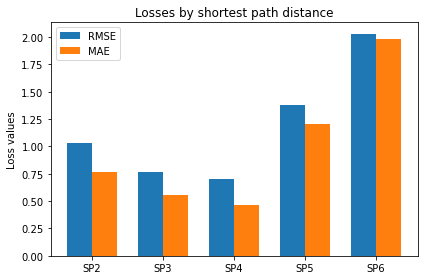

Embedding method:  sdne Binary operator: conv
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 2, 128, 1) Train y shape: (1104965,) 
 Test X shape: (117849, 2, 128, 1) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 53s - loss: 0.8250 - mae: 0.7092 - val_loss: 0.7112 - val_mae: 0.6485
Epoch 2/15
24172/24172 - 63s - loss: 0.7563 - mae: 0.6684 - val_loss: 0.6955 - val_mae: 0.6403
Epoch 3/15
24172/24172 - 63s - loss: 0.7376 - mae: 0.6564 - val_loss: 0.6815 - val_mae: 0.6256
Epoch 4/15
24172/24172 - 53s - loss: 0.7267 - mae: 0.6490 - val_loss: 0.6547 - val_mae: 0.5920
Epoch 5/15
24172/24172 - 63s - loss: 0.7189 - mae: 0.6439 - val_loss: 0.6700 - val_mae: 0.6343
Epoch 6/15
24172/24172 - 53s - loss: 0.7132 - mae: 0.6400 - val_loss: 0.6804 - val_mae: 0.6333
Epoch 7/15
24172/24172 - 53s - loss: 0.7067 - mae: 0.6358 - val_loss: 0.6566 - val_mae: 0.6170
Epoch 8/15
24172/24172 - 53s - loss: 0.7024 - mae: 0.6329 - val_loss

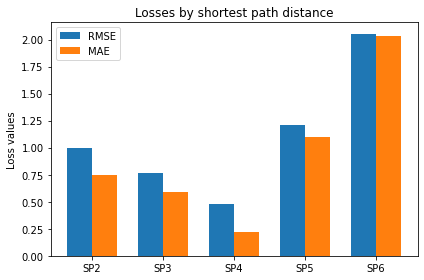

### EMBEDDING RUN line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  line Binary operator: avg
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 128) Train y shape: (1104965,) 
 Test X shape: (117849, 128) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 38s - loss: 0.7322 - mae: 0.6505 - val_loss: 0.5482 - val_mae: 0.5428
Epoch 2/15
24172/24172 - 38s - loss: 0.5814 - mae: 0.5599 - val_loss: 0.4571 - val_mae: 0.4432
Epoch 3/15
24172/24172 - 38s - loss: 0.5099 - mae: 0.5109 - val_loss: 0.4033 - val_mae: 0.4299
Epoch 4/15
24172/24172 - 38s - loss: 0.4743 - mae: 0.4847 - val_loss: 0.4156 - val_mae: 0.4203
Epoch 5/15
24172/24172 - 38s - loss: 0.4527 - mae: 0.4679 - val_loss: 0.3381 - val_mae: 0.3676
Epoch 6/15
24172/24172 - 38s - loss: 0.4359 - mae: 0.4548 - val_loss: 0.3444 - val_mae: 0.3693
Epoch 7/15
24172/24172 - 38s - loss: 0.4215 - mae: 0.4445 - val_loss: 0.3128 - val_mae: 0.3

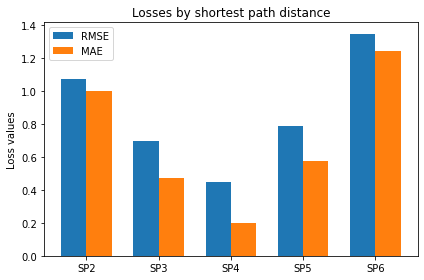

Embedding method:  line Binary operator: concat
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 256) Train y shape: (1104965,) 
 Test X shape: (117849, 256) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 40s - loss: 0.6463 - mae: 0.5969 - val_loss: 0.4376 - val_mae: 0.4615
Epoch 2/15
24172/24172 - 41s - loss: 0.4203 - mae: 0.4528 - val_loss: 0.2916 - val_mae: 0.3395
Epoch 3/15
24172/24172 - 41s - loss: 0.3444 - mae: 0.3975 - val_loss: 0.2495 - val_mae: 0.3171
Epoch 4/15
24172/24172 - 39s - loss: 0.2994 - mae: 0.3638 - val_loss: 0.2354 - val_mae: 0.2871
Epoch 5/15
24172/24172 - 39s - loss: 0.2697 - mae: 0.3424 - val_loss: 0.1881 - val_mae: 0.2501
Epoch 6/15
24172/24172 - 39s - loss: 0.2496 - mae: 0.3273 - val_loss: 0.1748 - val_mae: 0.2309
Epoch 7/15
24172/24172 - 42s - loss: 0.2348 - mae: 0.3158 - val_loss: 0.1680 - val_mae: 0.2345
Epoch 8/15
24172/24172 - 39s - loss: 0.2245 - mae: 0.3072 - val_loss: 0.1474 -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.08007219 0.59361421 0.22439778 0.18958003 0.03328786 0.
 0.         0.         0.         0.        ]
F1 score: 	 [0.1397946  0.45311893 0.24986635 0.16757869 0.01848485 0.
 0.         0.         0.         0.        ]
RMSE at length 2: 2.198985649942451 MAE at length 2: 1.7060745208233385
RMSE at length 3: 1.8109831817838098 MAE at length 3: 1.005857763599362
RMSE at length 4: 1.5433046806941626 MAE at length 4: 1.148039911493341
RMSE at length 5: 1.5482212072238328 MAE at length 5: 1.2396988906497624
RMSE at length 6: 2.1488281650580614 MAE at length 6: 1.9664392905866304


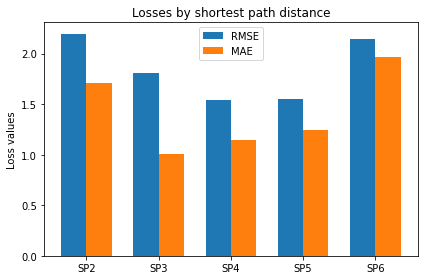

Embedding method:  line Binary operator: conv
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 2, 128, 1) Train y shape: (1104965,) 
 Test X shape: (117849, 2, 128, 1) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 54s - loss: 0.6267 - mae: 0.5897 - val_loss: 0.4794 - val_mae: 0.5129
Epoch 2/15
24172/24172 - 53s - loss: 0.4649 - mae: 0.4829 - val_loss: 0.3773 - val_mae: 0.4254
Epoch 3/15
24172/24172 - 63s - loss: 0.4155 - mae: 0.4478 - val_loss: 0.3204 - val_mae: 0.3441
Epoch 4/15
24172/24172 - 53s - loss: 0.3966 - mae: 0.4353 - val_loss: 0.4201 - val_mae: 0.4205
Epoch 5/15
24172/24172 - 53s - loss: 0.3824 - mae: 0.4250 - val_loss: 0.2758 - val_mae: 0.3244
Epoch 6/15
24172/24172 - 53s - loss: 0.3728 - mae: 0.4188 - val_loss: 0.2568 - val_mae: 0.2965
Epoch 7/15
24172/24172 - 53s - loss: 0.3671 - mae: 0.4153 - val_loss: 0.2839 - val_mae: 0.3714
Epoch 8/15
24172/24172 - 53s - loss: 0.3587 - mae: 0.4100 - val_loss

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.01256482 0.48468181 0.06529454 0.08646989 0.15716235 0.
 0.         0.         0.         0.        ]
F1 score: 	 [0.02481669 0.41181419 0.07697797 0.06730139 0.07457759 0.
 0.         0.         0.         0.        ]
RMSE at length 2: 2.428409779478567 MAE at length 2: 2.0191670664564914
RMSE at length 3: 2.0054721355161944 MAE at length 3: 1.28158517133271
RMSE at length 4: 2.444635994733308 MAE at length 4: 1.922306182941594
RMSE at length 5: 2.3742126895887234 MAE at length 5: 2.0219889064976226
RMSE at length 6: 1.5616481306741923 MAE at length 6: 1.266575716234652


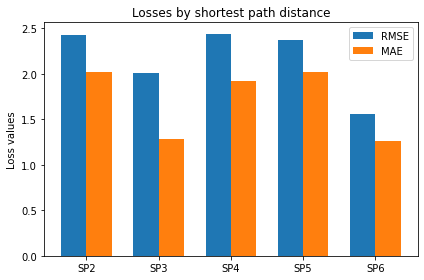

### EMBEDDING RUN harp_line ###
#### TRAIN TEST LOOP
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  harp_line Binary operator: avg
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 128) Train y shape: (1104965,) 
 Test X shape: (117849, 128) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 39s - loss: 0.4393 - mae: 0.4933 - val_loss: 0.1917 - val_mae: 0.3046
Epoch 2/15
24172/24172 - 39s - loss: 0.2881 - mae: 0.3944 - val_loss: 0.1635 - val_mae: 0.2774
Epoch 3/15
24172/24172 - 36s - loss: 0.2608 - mae: 0.3728 - val_loss: 0.1431 - val_mae: 0.2570
Epoch 4/15
24172/24172 - 36s - loss: 0.2457 - mae: 0.3597 - val_loss: 0.1590 - val_mae: 0.2704
Epoch 5/15
24172/24172 - 38s - loss: 0.2351 - mae: 0.3501 - val_loss: 0.1315 - val_mae: 0.2279
Epoch 6/15
24172/24172 - 38s - loss: 0.2290 - mae: 0.3441 - val_loss: 0.1155 - val_mae: 0.2181
Epoch 7/15
24172/24172 - 36s - loss: 0.2250 - mae: 0.3400 - val_loss: 0.1752 - va

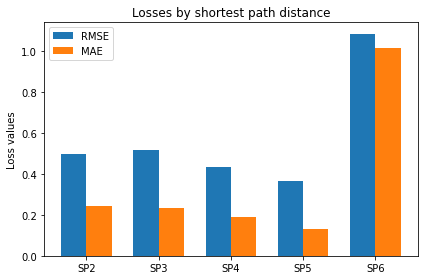

Embedding method:  harp_line Binary operator: concat
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 256) Train y shape: (1104965,) 
 Test X shape: (117849, 256) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 42s - loss: 0.2872 - mae: 0.3864 - val_loss: 0.0783 - val_mae: 0.1893
Epoch 2/15
24172/24172 - 39s - loss: 0.1518 - mae: 0.2820 - val_loss: 0.0534 - val_mae: 0.1514
Epoch 3/15
24172/24172 - 41s - loss: 0.1273 - mae: 0.2531 - val_loss: 0.0480 - val_mae: 0.1336
Epoch 4/15
24172/24172 - 39s - loss: 0.1157 - mae: 0.2374 - val_loss: 0.0381 - val_mae: 0.1182
Epoch 5/15
24172/24172 - 39s - loss: 0.1076 - mae: 0.2257 - val_loss: 0.0422 - val_mae: 0.1234
Epoch 6/15
24172/24172 - 41s - loss: 0.1021 - mae: 0.2177 - val_loss: 0.0362 - val_mae: 0.1100
Epoch 7/15
24172/24172 - 41s - loss: 0.0984 - mae: 0.2121 - val_loss: 0.0442 - val_mae: 0.1252
Epoch 8/15
24172/24172 - 41s - loss: 0.0950 - mae: 0.2069 - val_loss: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.53172047 0.87517188 0.64689183 0.77535658 0.53587995 0.        ]
F1 score: 	 [0.66286935 0.66421072 0.70487888 0.78780255 0.67584308 0.        ]
RMSE at length 2: 0.6869584479193424 MAE at length 2: 0.4694903250862404
RMSE at length 3: 0.3533102280790594 MAE at length 3: 0.12482811726527694
RMSE at length 4: 0.7041040654365697 MAE at length 4: 0.4006596250991525
RMSE at length 5: 0.5907199668534175 MAE at length 5: 0.2657488114104596
RMSE at length 6: 0.8354361826493227 MAE at length 6: 0.5418826739427012


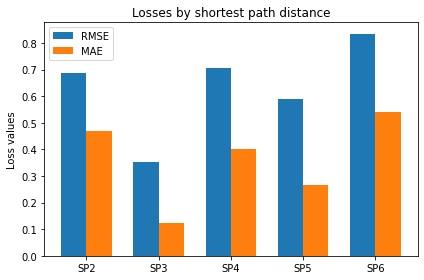

Embedding method:  harp_line Binary operator: conv
Embedded training set size: 1104965
Embedded test set size: 117849
Train test split summary: 
 Train X shape: (1104965, 2, 128, 1) Train y shape: (1104965,) 
 Test X shape: (117849, 2, 128, 1) Test y shape: (117849,)




Epoch 1/15
24172/24172 - 62s - loss: 0.3504 - mae: 0.4354 - val_loss: 0.1571 - val_mae: 0.2626
Epoch 2/15
24172/24172 - 52s - loss: 0.2670 - mae: 0.3743 - val_loss: 0.1839 - val_mae: 0.3318
Epoch 3/15
24172/24172 - 53s - loss: 0.2487 - mae: 0.3594 - val_loss: 0.1678 - val_mae: 0.3066
Epoch 4/15
24172/24172 - 62s - loss: 0.2394 - mae: 0.3516 - val_loss: 0.1358 - val_mae: 0.2557
Epoch 5/15
24172/24172 - 52s - loss: 0.2334 - mae: 0.3465 - val_loss: 0.1349 - val_mae: 0.2585
Epoch 6/15
24172/24172 - 52s - loss: 0.2285 - mae: 0.3427 - val_loss: 0.1672 - val_mae: 0.3092
Epoch 7/15
24172/24172 - 52s - loss: 0.2242 - mae: 0.3387 - val_loss: 0.2100 - val_mae: 0.3538
Epoch 8/15
24172/24172 - 62s - loss: 0.2212 - mae: 0.3362 - val

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.34393347 0.80405368 0.67156515 0.78684628 0.39590723 0.        ]
F1 score: 	 [0.51077184 0.58534876 0.65057025 0.71387491 0.5642621  0.        ]
RMSE at length 2: 0.8179222886172013 MAE at length 2: 0.6600872684074658
RMSE at length 3: 0.46776045791951 MAE at length 3: 0.20356416038721742
RMSE at length 4: 0.5749469725185092 MAE at length 4: 0.3291445747923016
RMSE at length 5: 0.5530494628867892 MAE at length 5: 0.24405705229793978
RMSE at length 6: 1.2280265116166214 MAE at length 6: 0.8783083219645293


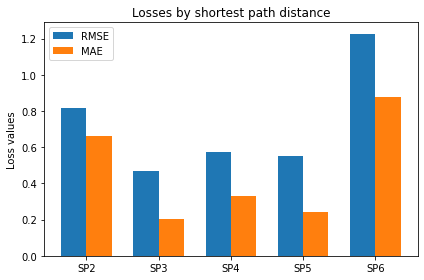

In [ ]:
landmark_techniques = ["random", "community_detection", "coarsening"]
embedding_techniques = ["node2vec", "harp_node2vec","sdne", "line", "harp_line"]
for landmark_technique in landmark_techniques:
  print("### LANDMARK RUN", landmark_technique, "###")
  train_list1, train_list2, y_train = load_training_data(dataset, landmark_technique)
  test_list1, test_list2, y_test = load_testing_data(dataset, landmark_technique)
  
  for embedding_technique in embedding_techniques:
    print("### EMBEDDING RUN", embedding_technique, "###")
    train_test_loop(emb_method = embedding_technique, epochs= 15,dataset= "facebook") # No embeddings params set as default values are the optimised ones


### Embedding Optimization

In [ ]:
def read_data(dataset):
  if dataset == "facebook":
      G=nx.read_edgelist("./datasets/facebook_edges.txt")
  elif dataset == "blogcatalog":
      G = nx.read_edgelist('./datasets/blogcatalog_edges.csv', delimiter=',', nodetype=str, encoding="utf-8")
  elif dataset == "douban":
      G = nx.read_edgelist('./datasets/douban_edges.csv', delimiter=',', nodetype=str, encoding="utf-8")
      G = nx.relabel.convert_node_labels_to_integers(G, first_label=0, ordering="sorted")
      mapping = {}
      for v in G.nodes():
        mapping[v] = str(v)
      G = nx.relabel.relabel_nodes(G, mapping)
  elif dataset == "youtube":
      G = nx.read_edgelist('./datasets/youtube_edges.csv', delimiter=',', nodetype=str, encoding="utf-8")
      G = nx.relabel.convert_node_labels_to_integers(G, first_label=0, ordering="sorted")
  elif dataset == "flickr":
      G=nx.read_edgelist("./datasets/flickr_edges.txt")
  else:
      print("Invalid dataset name")
  
  nodes = list(G.nodes())
  edges = list(G.edges())
  num_nodes = len(nodes)
  num_edges = len(edges)
  print("Number of nodes", num_nodes)
  print("Number of edges", num_edges)
  return G, nodes, edges, num_nodes, num_edges

In [ ]:
from GraphEmbedding.ge.models import Node2Vec, DeepWalk, SDNE, Struc2Vec, LINE


def train_embedding(G, params={}, embedding_method="node2vec", num_nodes=4039, dataset="facebook"):
  print("Params for Embeddings: ", params, " with embedding type: ", embedding_method)
  range_start = 0
  #if dataset != "facebook":
  #  range_start = 1
  #print("range start is", range_start)

  if embedding_method == "node2vec":
    q=1
    p=1
    window_size = 10
    if params:
      if 'q' in params.keys():
        q = params['q']
      if 'p' in params.keys():
        p = params['p']
      if 'window_size' in params.keys():
        window_size = params['window_size']
    model = Node2Vec(G, 80, 10, q=q, p=p) # default params from paper implementation
    model.train(window_size = window_size)
    embedding_vectors = model.get_embeddings()
  elif embedding_method == "deepwalk":
    model = DeepWalk(G, 80, 40) # parameters as in the paper
    model.train()
    embedding_vectors = model.get_embeddings()
  elif embedding_method == "sdne":
    layer_config = [int(num_nodes*0.1), 128]
    if params:
      layer_config = params["layer_config"]
    model = SDNE(G, hidden_size=layer_config) # same hidden sizes as in paper for arxiv GR-QC as it has similar number of nodes as facebook
    model.train( epochs=40, batch_size=512, verbose=0)
    embedding_vectors = model.get_embeddings()
  elif embedding_method == "struc2vec":
    model = Struc2Vec(G)
    model.train()
    embedding_vectors = model.get_embeddings()
  elif embedding_method == "line":
    order = "second"
    if params:
      order = params["order"]
    embedding_size = 128
    if order == "all":
      embedding_size = 64
    model = LINE(G, embedding_size= embedding_size, order=order)
    model.train(epochs=50, batch_size=512, verbose=0)
    embedding_vectors = model.get_embeddings()
  
  num_nodes = max([int(emb) for emb in embedding_vectors.keys()])
  

  embedding_vectors_res = np.array(list(embedding_vectors.values()))
  for i in range(range_start,num_nodes-range_start):
    embedding_vectors_res[i] = embedding_vectors[str(i)]
  np.save("./datasets/"+dataset+"_"+embedding_method+"_p_"+str(params['p'])+"_q_"+str(params['q'])+".npy", embedding_vectors_res)
  print("EMBEDDING VECTORS SAVED")

In [ ]:
def train_test_loop_optim(emb_method, emb_size, epochs, emb_params={}):
  train_embedding(G, emb_params, emb_method)
  embedding_vectors = load_embedding(emb_method+"_p_"+str(emb_params['p'])+"_q_"+str(emb_params['q']))

  # Test with avg binary operator
  print("Embedding method: ", emb_method, "Binary operator: conv")
  X_train, y_train, X_test, y_test = preprocess_embeddings(embedding_vectors, train_list1, train_list2, test_list1, test_list2, emb_size,"conv")
  shuffle_in_unison(X_train, y_train)
  print("\n")
  model = create_regression_conv_model(emb_size =emb_size)
  print("\n")
  train_regressor(model, X_train, y_train, epochs=epochs)
  print("\n")
  test_model(model, X_train, X_test, y_test)

In [ ]:
def optimize_embeddings(embedding_type = "node2vec"): # requires to have a num_nodes variable before and also a train_test_loop method as defined above
  params = {}
  if embedding_type == "node2vec":
    ps = [2**-2, 2**-1, 1, 2] 
    qs = ps
    for p in ps:
      for q in qs:
        params["p"] = p
        params["q"] = q
        train_test_loop_optim(emb_method="node2vec", emb_size= 128, epochs = 15, emb_params = params)
  elif embedding_type == "line":
    first_or_second = [ "first", "second"]
    for f_s in first_or_second:
      params["order"] = f_s
      train_test_loop_optim(emb_method="line", emb_size= 128, epochs = 15, emb_params = params)
  elif embedding_type == "sdne":
    layer_configs = [[int((num_nodes*0.1)), 128], [int((num_nodes*0.1)), int((num_nodes*0.05)), 128], [int(num_nodes), int(num_nodes*0.5), 128] ] # conservative as in paper vs deeper vs large vertically and deep
    for layer_config in layer_configs:
      params["layer_config"] = layer_config
      train_test_loop_optim(emb_method="sdne", emb_size= layer_config[-1], epochs= 15, emb_params = params)

train_list1, train_list2, y_train = load_training_data("facebook", "random")
test_list1, test_list2, y_test = load_testing_data("facebook", "random")
G, nodes, edges, num_nodes, num_edges = read_data("facebook")

optimize_embeddings()

Number of training pairs: 1022640
Path Lengths in train set:  [2 3 4 5 6]  Size of each length:  [389132 320865 221561  72701  18381]
Number of testing pairs: 109978
Path Lengths in test set:  [2 3 4 5 6]  Size of each length:  [42666 35029 23663  6947  1673]
Number of nodes 4039
Number of edges 88234
Params for Embeddings:  {'p': 0.25, 'q': 0.25}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.1s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.25_q_0.25.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 68s - loss: 0.1736 - mae: 0.3057 - val_loss: 0.0502 - val_mae: 0.1626
Epoch 2/15
22371/22371 - 72s - loss: 0.1211 - mae: 0.2539 - val_loss: 0.0370 - val_mae: 0.1299
Epoch 3/15
22371/22371 - 69s - loss: 0.1124 - mae: 0.2431 - val_loss: 0.0643 - val_mae: 0.1783
Epoch 4/15
22371/22371 - 69s - loss: 0.1091 - mae: 0.2386 - val_loss: 0.0341 - val_mae: 0.1229
Epoch 5/15
22371/22371 - 66s - loss: 0.1059 - mae: 0.2350 - val_loss: 0.0308 - val_mae: 0.1105
Epoch 6/15
22371/22371 - 58s - loss: 0.1045 - mae: 0.2329 - val_loss: 0.0474 - val_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.9965312  0.96108938 0.85382242 0.88253923 0.65929468 0.        ]
F1 score: 	 [0.98568464 0.93352004 0.89859456 0.88887278 0.79153211 0.        ]
Params for Embeddings:  {'p': 0.25, 'q': 0.5}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.2s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.25_q_0.5.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 70s - loss: 0.1804 - mae: 0.3133 - val_loss: 0.0437 - val_mae: 0.1447
Epoch 2/15
22371/22371 - 80s - loss: 0.1248 - mae: 0.2594 - val_loss: 0.0350 - val_mae: 0.1223
Epoch 3/15
22371/22371 - 78s - loss: 0.1167 - mae: 0.2491 - val_loss: 0.0333 - val_mae: 0.1239
Epoch 4/15
22371/22371 - 78s - loss: 0.1122 - mae: 0.2435 - val_loss: 0.0498 - val_mae: 0.1570
Epoch 5/15
22371/22371 - 80s - loss: 0.1089 - mae: 0.2395 - val_loss: 0.0281 - val_mae: 0.1083
Epoch 6/15
22371/22371 - 65s - loss: 0.1070 - mae: 0.2370 - val_loss: 0.0300 - val_m

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.99313271 0.95535128 0.87360014 0.888585   0.7160789  0.        ]
F1 score: 	 [0.9885221  0.93293932 0.8995257  0.90579604 0.82877897 0.        ]
Params for Embeddings:  {'p': 0.25, 'q': 1}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.1s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.25_q_1.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 51s - loss: 0.1781 - mae: 0.3095 - val_loss: 0.0458 - val_mae: 0.1412
Epoch 2/15
22371/22371 - 60s - loss: 0.1263 - mae: 0.2564 - val_loss: 0.0578 - val_mae: 0.1721
Epoch 3/15
22371/22371 - 57s - loss: 0.1182 - mae: 0.2452 - val_loss: 0.0480 - val_mae: 0.1622
Epoch 4/15
22371/22371 - 82s - loss: 0.1133 - mae: 0.2385 - val_loss: 0.0466 - val_mae: 0.1517
Epoch 5/15
22371/22371 - 84s - loss: 0.1107 - mae: 0.2352 - val_loss: 0.0358 - val_mae: 0.1295
Epoch 6/15
22371/22371 - 76s - loss: 0.1084 - mae: 0.2323 - val_loss: 0.0360 - val_mae

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.96995266 0.96685603 0.91302878 0.83719591 0.66646742
 0.        ]
F1 score: 	 [0.         0.97869221 0.94062101 0.91945952 0.86948722 0.74983188
 0.        ]
Params for Embeddings:  {'p': 0.25, 'q': 2}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.25_q_2.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 61s - loss: 0.1815 - mae: 0.3144 - val_loss: 0.0640 - val_mae: 0.2011
Epoch 2/15
22371/22371 - 49s - loss: 0.1242 - mae: 0.2591 - val_loss: 0.0419 - val_mae: 0.1405
Epoch 3/15
22371/22371 - 59s - loss: 0.1164 - mae: 0.2483 - val_loss: 0.0381 - val_mae: 0.1389
Epoch 4/15
22371/22371 - 59s - loss: 0.1119 - mae: 0.2424 - val_loss: 0.0461 - val_mae: 0.1478
Epoch 5/15
22371/22371 - 78s - loss: 0.1090 - mae: 0.2386 - val_loss: 0.0347 - val_mae: 0.1263
Epoch 6/15
22371/22371 - 59s - loss: 0.1060 - mae: 0.2351 - val_loss: 0.0339 - val_mae

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.1s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.5_q_0.25.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 50s - loss: 0.1816 - mae: 0.3144 - val_loss: 0.0407 - val_mae: 0.1377
Epoch 2/15
22371/22371 - 50s - loss: 0.1244 - mae: 0.2578 - val_loss: 0.0357 - val_mae: 0.1269
Epoch 3/15
22371/22371 - 49s - loss: 0.1163 - mae: 0.2461 - val_loss: 0.0348 - val_mae: 0.1218
Epoch 4/15
22371/22371 - 50s - loss: 0.1118 - mae: 0.2400 - val_loss: 0.0383 - val_mae: 0.1328
Epoch 5/15
22371/22371 - 49s - loss: 0.1092 - mae: 0.2364 - val_loss: 0.0369 - val_mae: 0.1321
Epoch 6/15
22371/22371 - 50s - loss: 0.1066 - mae: 0.2333 - val_loss: 0.0372 - val_m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.5_q_0.5.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 51s - loss: 0.1865 - mae: 0.3146 - val_loss: 0.0543 - val_mae: 0.1666
Epoch 2/15
22371/22371 - 50s - loss: 0.1307 - mae: 0.2583 - val_loss: 0.0470 - val_mae: 0.1518
Epoch 3/15
22371/22371 - 69s - loss: 0.1226 - mae: 0.2474 - val_loss: 0.0675 - val_mae: 0.1952
Epoch 4/15
22371/22371 - 54s - loss: 0.1177 - mae: 0.2414 - val_loss: 0.0407 - val_mae: 0.1435
Epoch 5/15
22371/22371 - 63s - loss: 0.1151 - mae: 0.2375 - val_loss: 0.0473 - val_mae: 0.1553
Epoch 6/15
22371/22371 - 51s - loss: 0.1114 - mae: 0.2326 - val_loss: 0.0400 - val_ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.8s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.5_q_1.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 81s - loss: 0.1810 - mae: 0.3104 - val_loss: 0.0735 - val_mae: 0.1937
Epoch 2/15
22371/22371 - 81s - loss: 0.1300 - mae: 0.2587 - val_loss: 0.0456 - val_mae: 0.1522
Epoch 3/15
22371/22371 - 85s - loss: 0.1215 - mae: 0.2478 - val_loss: 0.0597 - val_mae: 0.1761
Epoch 4/15
22371/22371 - 76s - loss: 0.1176 - mae: 0.2416 - val_loss: 0.0623 - val_mae: 0.1783
Epoch 5/15
22371/22371 - 82s - loss: 0.1140 - mae: 0.2365 - val_loss: 0.0327 - val_mae: 0.1182
Epoch 6/15
22371/22371 - 75s - loss: 0.1117 - mae: 0.2335 - val_loss: 0.0495 - val_mae:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.99013266 0.95849154 0.91324008 0.83647618 0.58278542
 0.        ]
F1 score: 	 [0.         0.98786362 0.94542843 0.9152126  0.86242208 0.72979042
 0.        ]
Params for Embeddings:  {'p': 0.5, 'q': 2}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.7s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_0.5_q_2.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 76s - loss: 0.1798 - mae: 0.3101 - val_loss: 0.0457 - val_mae: 0.1424
Epoch 2/15
22371/22371 - 77s - loss: 0.1218 - mae: 0.2541 - val_loss: 0.0323 - val_mae: 0.1188
Epoch 3/15
22371/22371 - 75s - loss: 0.1133 - mae: 0.2445 - val_loss: 0.0330 - val_mae: 0.1226
Epoch 4/15
22371/22371 - 69s - loss: 0.1088 - mae: 0.2391 - val_loss: 0.0316 - val_mae: 0.1165
Epoch 5/15
22371/22371 - 80s - loss: 0.1058 - mae: 0.2355 - val_loss: 0.0239 - val_mae: 0.0972
Epoch 6/15
22371/22371 - 66s - loss: 0.1037 - mae: 0.2329 - val_loss: 0.0276 - val_mae:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.95000703 0.95075509 0.92934117 0.90154023 0.78601315 0.        ]
F1 score: 	 [0.96653273 0.92722312 0.93562798 0.90597425 0.78087886 0.        ]
Params for Embeddings:  {'p': 1, 'q': 0.25}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_1_q_0.25.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 62s - loss: 0.1791 - mae: 0.3126 - val_loss: 0.0504 - val_mae: 0.1515
Epoch 2/15
22371/22371 - 60s - loss: 0.1233 - mae: 0.2584 - val_loss: 0.0472 - val_mae: 0.1477
Epoch 3/15
22371/22371 - 58s - loss: 0.1152 - mae: 0.2481 - val_loss: 0.0740 - val_mae: 0.1982
Epoch 4/15
22371/22371 - 60s - loss: 0.1109 - mae: 0.2425 - val_loss: 0.0329 - val_mae: 0.1189
Epoch 5/15
22371/22371 - 49s - loss: 0.1088 - mae: 0.2398 - val_loss: 0.0275 - val_mae: 0.1116
Epoch 6/15
22371/22371 - 49s - loss: 0.1066 - mae: 0.2372 - val_loss: 0.0303 - val_mae

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.99346084 0.95495161 0.90567553 0.92370808 0.74835625
 0.        ]
F1 score: 	 [0.         0.9874205  0.94542423 0.92498597 0.91841992 0.82996354
 0.        ]
Params for Embeddings:  {'p': 1, 'q': 0.5}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_1_q_0.5.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 66s - loss: 0.1795 - mae: 0.3128 - val_loss: 0.0454 - val_mae: 0.1506
Epoch 2/15
22371/22371 - 56s - loss: 0.1281 - mae: 0.2623 - val_loss: 0.0394 - val_mae: 0.1313
Epoch 3/15
22371/22371 - 56s - loss: 0.1198 - mae: 0.2509 - val_loss: 0.0633 - val_mae: 0.1899
Epoch 4/15
22371/22371 - 52s - loss: 0.1145 - mae: 0.2435 - val_loss: 0.0368 - val_mae: 0.1316
Epoch 5/15
22371/22371 - 63s - loss: 0.1104 - mae: 0.2378 - val_loss: 0.0830 - val_mae: 0.1975
Epoch 6/15
22371/22371 - 63s - loss: 0.1080 - mae: 0.2343 - val_loss: 0.0258 - val_mae:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_1_q_1.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 54s - loss: 0.1789 - mae: 0.3098 - val_loss: 0.0450 - val_mae: 0.1366
Epoch 2/15
22371/22371 - 53s - loss: 0.1239 - mae: 0.2572 - val_loss: 0.0327 - val_mae: 0.1144
Epoch 3/15
22371/22371 - 64s - loss: 0.1164 - mae: 0.2476 - val_loss: 0.0392 - val_mae: 0.1371
Epoch 4/15
22371/22371 - 62s - loss: 0.1117 - mae: 0.2416 - val_loss: 0.0371 - val_mae: 0.1382
Epoch 5/15
22371/22371 - 61s - loss: 0.1095 - mae: 0.2385 - val_loss: 0.0387 - val_mae: 0.1278
Epoch 6/15
22371/22371 - 53s - loss: 0.1076 - mae: 0.2361 - val_loss: 0.0452 - val_mae: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 	 [0.         0.99008578 0.96876873 0.92693234 0.88656974 0.50866707
 0.        ]
F1 score: 	 [0.         0.98751666 0.95467844 0.93658995 0.88370758 0.67246148
 0.        ]
Params for Embeddings:  {'p': 1, 'q': 2}  with embedding type:  node2vec
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.6s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_1_q_2.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 49s - loss: 0.1782 - mae: 0.3107 - val_loss: 0.0437 - val_mae: 0.1438
Epoch 2/15
22371/22371 - 49s - loss: 0.1260 - mae: 0.2585 - val_loss: 0.0515 - val_mae: 0.1693
Epoch 3/15
22371/22371 - 49s - loss: 0.1176 - mae: 0.2475 - val_loss: 0.0622 - val_mae: 0.1848
Epoch 4/15
22371/22371 - 50s - loss: 0.1136 - mae: 0.2417 - val_loss: 0.0353 - val_mae: 0.1277
Epoch 5/15
22371/22371 - 49s - loss: 0.1099 - mae: 0.2367 - val_loss: 0.0308 - val_mae: 0.1194
Epoch 6/15
22371/22371 - 49s - loss: 0.1077 - mae: 0.2331 - val_loss: 0.0869 - val_mae: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_2_q_0.25.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 50s - loss: 0.1811 - mae: 0.3135 - val_loss: 0.0469 - val_mae: 0.1454
Epoch 2/15
22371/22371 - 49s - loss: 0.1253 - mae: 0.2584 - val_loss: 0.0354 - val_mae: 0.1227
Epoch 3/15
22371/22371 - 49s - loss: 0.1160 - mae: 0.2461 - val_loss: 0.0401 - val_mae: 0.1425
Epoch 4/15
22371/22371 - 49s - loss: 0.1107 - mae: 0.2387 - val_loss: 0.0306 - val_mae: 0.1130
Epoch 5/15
22371/22371 - 49s - loss: 0.1080 - mae: 0.2345 - val_loss: 0.0317 - val_mae: 0.1226
Epoch 6/15
22371/22371 - 49s - loss: 0.1064 - mae: 0.2321 - val_loss: 0.0462 - val_mae

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.0s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_2_q_0.5.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 51s - loss: 0.1833 - mae: 0.3138 - val_loss: 0.0465 - val_mae: 0.1593
Epoch 2/15
22371/22371 - 59s - loss: 0.1257 - mae: 0.2605 - val_loss: 0.0368 - val_mae: 0.1329
Epoch 3/15
22371/22371 - 50s - loss: 0.1189 - mae: 0.2519 - val_loss: 0.0437 - val_mae: 0.1445
Epoch 4/15
22371/22371 - 60s - loss: 0.1151 - mae: 0.2470 - val_loss: 0.0374 - val_mae: 0.1379
Epoch 5/15
22371/22371 - 50s - loss: 0.1127 - mae: 0.2442 - val_loss: 0.0345 - val_mae: 0.1315
Epoch 6/15
22371/22371 - 60s - loss: 0.1112 - mae: 0.2425 - val_loss: 0.0317 - val_mae:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_2_q_1.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 52s - loss: 0.1776 - mae: 0.3094 - val_loss: 0.0502 - val_mae: 0.1533
Epoch 2/15
22371/22371 - 51s - loss: 0.1233 - mae: 0.2577 - val_loss: 0.0426 - val_mae: 0.1452
Epoch 3/15
22371/22371 - 62s - loss: 0.1152 - mae: 0.2477 - val_loss: 0.0465 - val_mae: 0.1514
Epoch 4/15
22371/22371 - 51s - loss: 0.1106 - mae: 0.2416 - val_loss: 0.0397 - val_mae: 0.1388
Epoch 5/15
22371/22371 - 51s - loss: 0.1079 - mae: 0.2381 - val_loss: 0.0301 - val_mae: 0.1194
Epoch 6/15
22371/22371 - 51s - loss: 0.1057 - mae: 0.2353 - val_loss: 0.0279 - val_mae: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.7s finished


Learning embedding vectors...
Learning embedding vectors done!
EMBEDDING VECTORS SAVED
./datasets/facebook_node2vec_p_2_q_2.npy
EMBEDDING VECTORS SHAPE: (4039, 128)
Embedding method:  node2vec Binary operator: conv
Embedded training set size: 1022640
Embedded test set size: 109978
Train test split summary: 
 Train X shape: (1022640, 2, 128, 1) Train y shape: (1022640,) 
 Test X shape: (109978, 2, 128, 1) Test y shape: (109978,)




Epoch 1/15
22371/22371 - 53s - loss: 0.1835 - mae: 0.3126 - val_loss: 0.0433 - val_mae: 0.1391
Epoch 2/15
22371/22371 - 52s - loss: 0.1305 - mae: 0.2578 - val_loss: 0.0533 - val_mae: 0.1668
Epoch 3/15
22371/22371 - 52s - loss: 0.1214 - mae: 0.2464 - val_loss: 0.0512 - val_mae: 0.1656
Epoch 4/15
22371/22371 - 52s - loss: 0.1167 - mae: 0.2397 - val_loss: 0.0631 - val_mae: 0.1994
Epoch 5/15
22371/22371 - 52s - loss: 0.1135 - mae: 0.2352 - val_loss: 0.0464 - val_mae: 0.1576
Epoch 6/15
22371/22371 - 51s - loss: 0.1115 - mae: 0.2325 - val_loss: 0.0476 - val_mae: 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
